<a href="https://colab.research.google.com/github/Patrick-Munyao/Customer-Segmentation---Using-R/blob/main/Customer_Segmentation_R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problem Definition


a) **Defining the Data Analytic Question** 

* Difficulty in understanding how the various characteristics of customers to a bank influence their chances of loan defaulting 
* Gap in understanding how the different characteristics of the customers relate and how the bank can mine information to streamline its marketing strategy to specific customer segments

We shall, therefore, perform a K-means and Hierarchical clustering on a bank's customer data to draw insights on the characteristics of different customers

b) **Metrics for Success**

This study shall be deemed successful if:


*   EDA is properly performed on the data
*   Relevant insights are drawn from data analysis
*   Optimal clustering of customers based on their characteristics
*   Comparisons of both K-Means and Hierarchical clustering on the dataset are well illustrated  






c) **Context**

Customer Segmentation is the process of dividing the customer-base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, level of education, credit score, interests, and miscellaneous spending habits etc.Customer segmentation can help us divide a diverse market into a number of smaller, 
more homogeneous markets based on one or more meaningful characteristics. 

The importance of customer segmentation include:

* Greater company focus - companies are able to understand its customer base/segments and as such be ware of what products or services to serve what segment of their customer base.
* Targetted communication - with specified segments, companies can know and choose proper communication platforms and pass information relevant to each segment
* satisfaction of customer preferences - given that segments have some differences among them, say income levels and age, companies can offer different product/service bundles and incentives to different segments. 

The study will be relevant in that, it will:
- Help the bank relate the various customer characteristics, say level of income and age vs chances of default, and so understand where higher credit risks lie. 
- Help the bank to employ targetted communication to customer segments


d) **Experimental Design**


Steps followed are:
- Business Understanding 
- Reading and previewing data
- Data preprocessing 
- Modelling
- Challenging the solution 
- Conclusion 

e) **Relevance of the data**

Dataset used in this study was sourced for Kaggle and compromise of bank customer information. These information include: customer age, level of education, years of experience, income, debts and income-debt ratios. The data has 850 observations and 10 features. It was deemed relevant in meeting the objectives of this study. 

#2. Loading data

In [ ]:
suppressPackageStartupMessages('data.table')

[1] "data.table"

In [ ]:
# Installaton and loading of relevant packages
library(data.table)
library(dplyr)
install.packages('caret')
library(caret)
install.packages('Amelia')
library(Amelia)
#package for the multiple imputation of multivariate incomplete data
install.packages("psych")
library(psych)
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("cluster")
library(cluster)


In [ ]:
#install.packages("factoextra")
#library(factoextra)

In [ ]:
# Reading the data
df <- fread('/content/Customer_Segmentation.csv')

In [ ]:
#review 4 rows
head(df,4)
#View(df)

Customer Id Age Edu Years Employed Income Card Debt Other Debt Defaulted
1 1           41  2    6              19    0.124     1.073      0        
2 2           47  1   26             100    4.582     8.218      0        
3 3           33  2   10              57    6.111     5.802      1        
4 4           29  2    4              19    0.681     0.516      0        
  Address DebtIncomeRatio
1 NBA001   6.3           
2 NBA021  12.8           
3 NBA013  20.9           
4 NBA009   6.3

#3) Checking the Data

In [ ]:
# Review bottom rows
tail(df,5)

Customer Id Age Edu Years Employed Income Card Debt Other Debt Defaulted
1 846         27  1    5             26     0.548     1.220      NA       
2 847         28  2    7             34     0.359     2.021       0       
3 848         25  4    0             18     2.802     3.210       1       
4 849         32  1   12             28     0.116     0.696       0       
5 850         52  1   16             64     1.866     3.638       0       
  Address DebtIncomeRatio
1 NBA007   6.8           
2 NBA002   7.0           
3 NBA001  33.4           
4 NBA012   2.9           
5 NBA025   8.6

In [ ]:
# Check size of data

dim(df)

[1] 850  10

Data consists of 850 entries and 10 variables 

In [ ]:
# Viewing features in the dataset
colnames(df)

[1] "Customer Id"     "Age"             "Edu"             "Years Employed" 
 [5] "Income"          "Card Debt"       "Other Debt"      "Defaulted"      
 [9] "Address"         "DebtIncomeRatio"

In [ ]:
# Checking the structure of the dataset
#library(dplyr)
glimpse(df)


Rows: 850
Columns: 10
$ `Customer Id`    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ Age              <int> 41, 47, 33, 29, 47, 40, 38, 42, 26, 47, 44, 34, 24, 4…
$ Edu              <int> 2, 1, 2, 2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 4,…
$ `Years Employed` <int> 6, 26, 10, 4, 31, 23, 4, 0, 5, 23, 8, 9, 7, 6, 2, 1, …
$ Income           <int> 19, 100, 57, 19, 253, 81, 56, 64, 18, 115, 88, 40, 18…
$ `Card Debt`      <dbl> 0.124, 4.582, 6.111, 0.681, 9.308, 0.998, 0.442, 0.27…
$ `Other Debt`     <dbl> 1.073, 8.218, 5.802, 0.516, 8.908, 7.831, 0.454, 3.94…
$ Defaulted        <int> 0, 0, 1, 0, 0, NA, 0, 0, NA, 0, 1, NA, 0, NA, 1, NA, …
$ Address          <chr> "NBA001", "NBA021", "NBA013", "NBA009", "NBA008", "NB…
$ DebtIncomeRatio  <dbl> 6.3, 12.8, 20.9, 6.3, 7.2, 10.9, 1.6, 6.6, 15.5, 4.0,…


Our data is in numeric (int, dbl) and character (chr) datatypes  

In [ ]:
#Checking for unique values in each column

lapply(df, function(x){length(unique(x))})

$`Customer Id`
[1] 850

$Age
[1] 37

$Edu
[1] 5

$`Years Employed`
[1] 33

$Income
[1] 129

$`Card Debt`
[1] 727

$`Other Debt`
[1] 788

$Defaulted
[1] 3

$Address
[1] 32

$DebtIncomeRatio
[1] 245

# 4) Data Preparation

**Uniformity**

In [ ]:
# We convert categorical variables (education and defaulted) to factors
df$Edu = factor(df$Edu)
df$Defaulted = factor(df$Defaulted)

In [ ]:
#checking the new structure of the dataset
print(str(df))

Classes ‘data.table’ and 'data.frame':	850 obs. of  10 variables:
 $ Customer Id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age            : int  41 47 33 29 47 40 38 42 26 47 ...
 $ Edu            : Factor w/ 5 levels "1","2","3","4",..: 2 1 2 2 1 1 2 3 1 3 ...
 $ Years Employed : int  6 26 10 4 31 23 4 0 5 23 ...
 $ Income         : int  19 100 57 19 253 81 56 64 18 115 ...
 $ Card Debt      : num  0.124 4.582 6.111 0.681 9.308 ...
 $ Other Debt     : num  1.073 8.218 5.802 0.516 8.908 ...
 $ Defaulted      : Factor w/ 2 levels "0","1": 1 1 2 1 1 NA 1 1 NA 1 ...
 $ Address        : chr  "NBA001" "NBA021" "NBA013" "NBA009" ...
 $ DebtIncomeRatio: num  6.3 12.8 20.9 6.3 7.2 10.9 1.6 6.6 15.5 4 ...
 - attr(*, ".internal.selfref")=<externalptr> 
NULL


In [ ]:
#Viewing the statistical summary of the data
print(summary(df))

  Customer Id         Age        Edu     Years Employed       Income      
 Min.   :  1.0   Min.   :20.00   1:460   Min.   : 0.000   Min.   : 13.00  
 1st Qu.:213.2   1st Qu.:29.00   2:235   1st Qu.: 3.000   1st Qu.: 24.00  
 Median :425.5   Median :34.00   3:101   Median : 7.000   Median : 35.00  
 Mean   :425.5   Mean   :35.03   4: 49   Mean   : 8.566   Mean   : 46.68  
 3rd Qu.:637.8   3rd Qu.:41.00   5:  5   3rd Qu.:13.000   3rd Qu.: 55.75  
 Max.   :850.0   Max.   :56.00           Max.   :33.000   Max.   :446.00  
   Card Debt         Other Debt     Defaulted    Address         
 Min.   : 0.0120   Min.   : 0.046   0   :517   Length:850        
 1st Qu.: 0.3825   1st Qu.: 1.046   1   :183   Class :character  
 Median : 0.8850   Median : 2.003   NA's:150   Mode  :character  
 Mean   : 1.5768   Mean   : 3.079                                
 3rd Qu.: 1.8985   3rd Qu.: 3.903                                
 Max.   :20.5610   Max.   :35.197                                
 DebtIncomeRa

There are null values (under Defaulted variable) in the dataset and shall be dealt with.



##Completeness

In [ ]:
#checking if there are missing values in the data
anyNA(df)

[1] TRUE

In [ ]:
#checking which columns have missing values
print(colSums(is.na(df)))

    Customer Id             Age             Edu  Years Employed          Income 
              0               0               0               0               0 
      Card Debt      Other Debt       Defaulted         Address DebtIncomeRatio 
              0               0             150               0               0 


There are 150 missing values under the feature 'Defaulted'.

In [ ]:
# Calculating the percentage of missing values 
data.frame(colMeans(is.na(df)))*100

colMeans.is.na.df..
Customer Id      0.00000           
Age              0.00000           
Edu              0.00000           
Years Employed   0.00000           
Income           0.00000           
Card Debt        0.00000           
Other Debt       0.00000           
Defaulted       17.64706           
Address          0.00000           
DebtIncomeRatio  0.00000

The 150 missing values constitute about 17.6% of the dataset. To avoid any information loss from our relatively small dataset, we shall forward fill the missing values

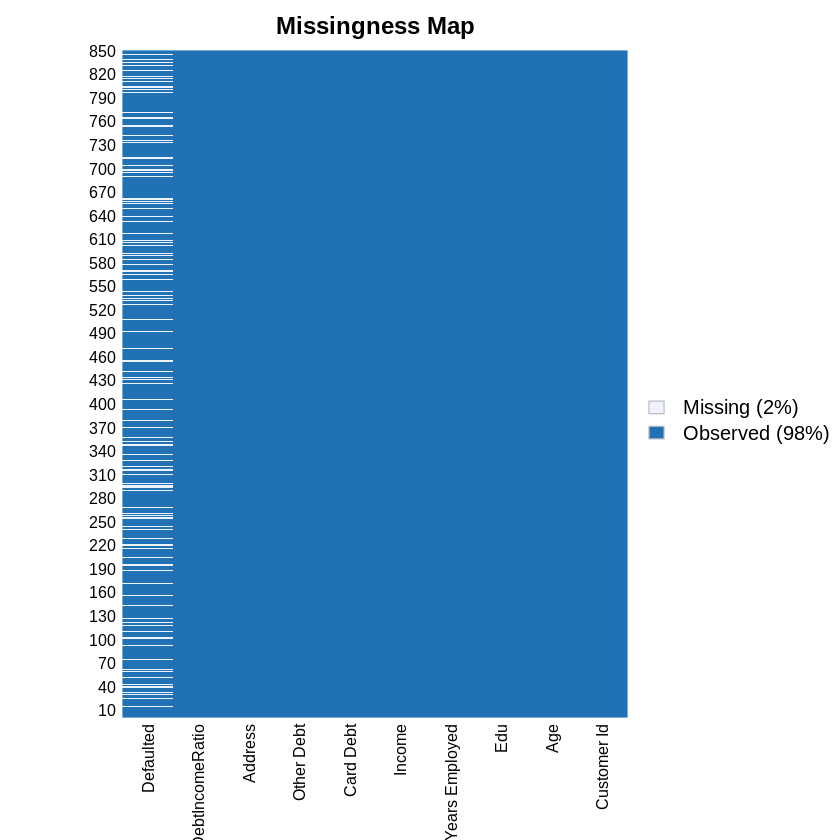

In [ ]:
#visualizing missing data - uses the library(Amelia)

missmap(df)

Shows there are some missng values

In [ ]:
# To forward fill missing values. The library(tidyr) is needed.
library(tidyr)
df_1 <- df %>% fill(Defaulted)

In [ ]:
# Check if missing values are availbale 
sum(is.na(df_1))

[1] 0

No missing values

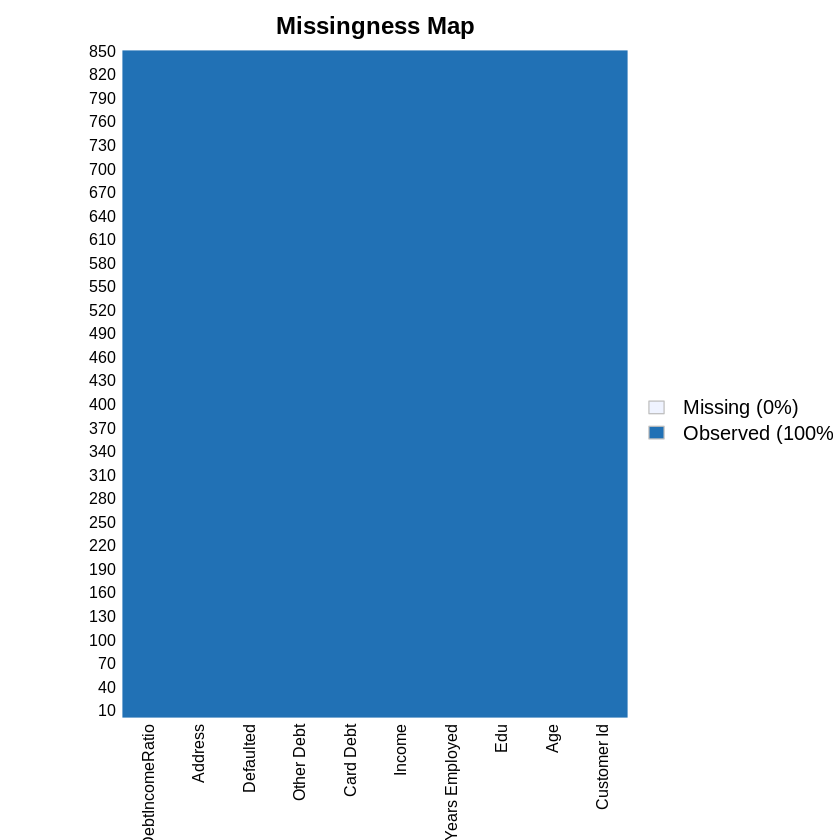

In [ ]:
#Confirm that no missing values with a missmap

missmap(df_1)

From the missmap, it is confirmed that there are no missing values left in the dataset

In [ ]:
# View our new dataset without NAs
head(df_1, 10)

Customer Id Age Edu Years Employed Income Card Debt Other Debt Defaulted
1   1          41  2    6              19    0.124     1.073      0        
2   2          47  1   26             100    4.582     8.218      0        
3   3          33  2   10              57    6.111     5.802      1        
4   4          29  2    4              19    0.681     0.516      0        
5   5          47  1   31             253    9.308     8.908      0        
6   6          40  1   23              81    0.998     7.831      0        
7   7          38  2    4              56    0.442     0.454      0        
8   8          42  3    0              64    0.279     3.945      0        
9   9          26  1    5              18    0.575     2.215      0        
10 10          47  3   23             115    0.653     3.947      0        
   Address DebtIncomeRatio
1  NBA001   6.3           
2  NBA021  12.8           
3  NBA013  20.9           
4  NBA009   6.3           
5  NBA008   7.2           
6  NBA016  10.9           
7  NBA013   1.6           
8  NBA009   6.6           
9  NBA006  15.5           
10 NBA011   4.0

In [ ]:
# New data size
dim(df_1)

[1] 850  10

We have 850 entries and 10 columns. All information in the dataset is retained

Dataset is now free of missing values. 

## Consistency

In [ ]:
# Checking for duplicate values
duplicated <- df_1[duplicated(df_1), ]
duplicated

Customer Id Age Edu Years Employed Income Card Debt Other Debt Defaulted
     Address DebtIncomeRatio

There are no duplicated values in the dataset

# Outliers

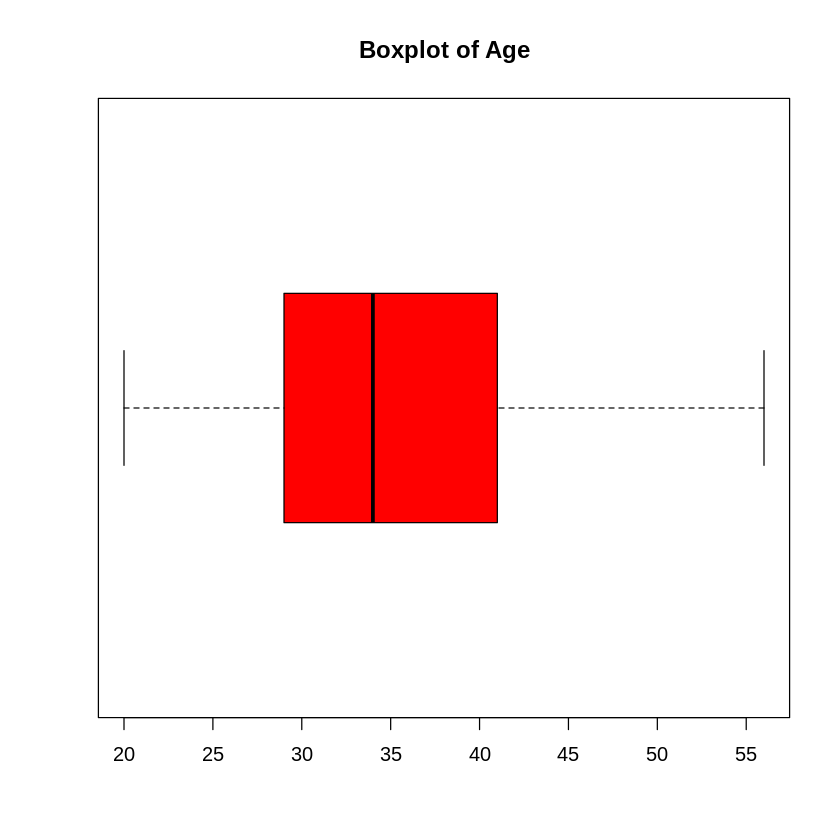

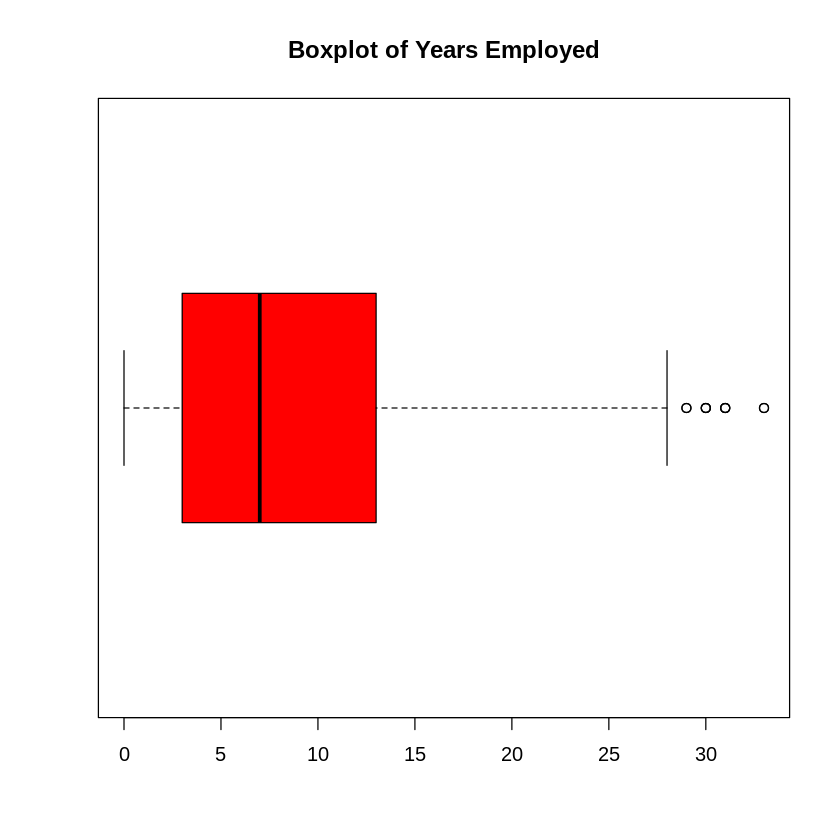

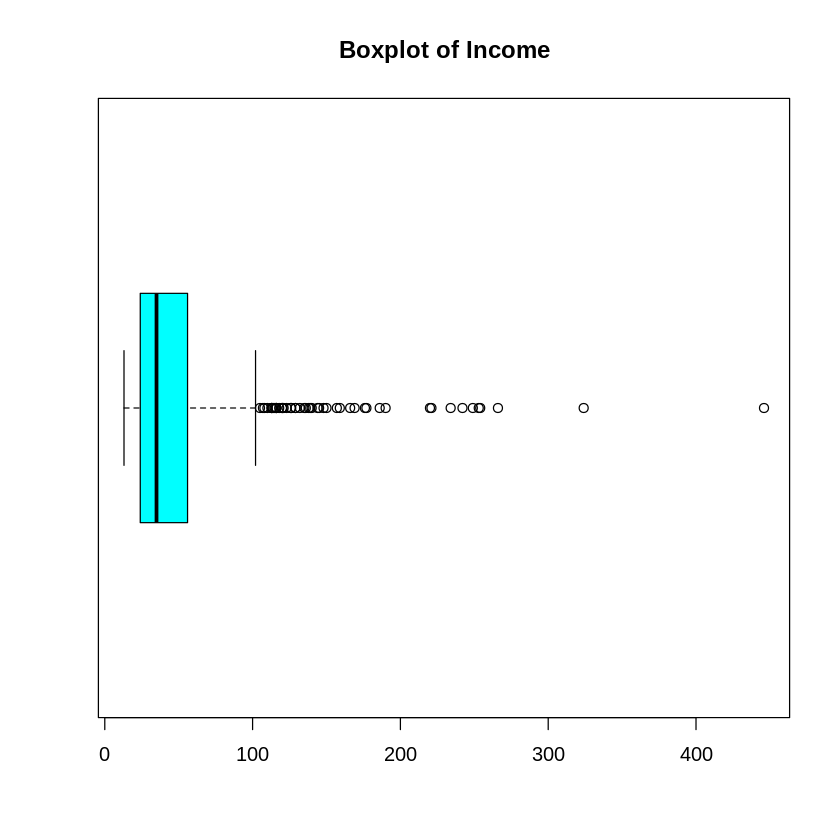

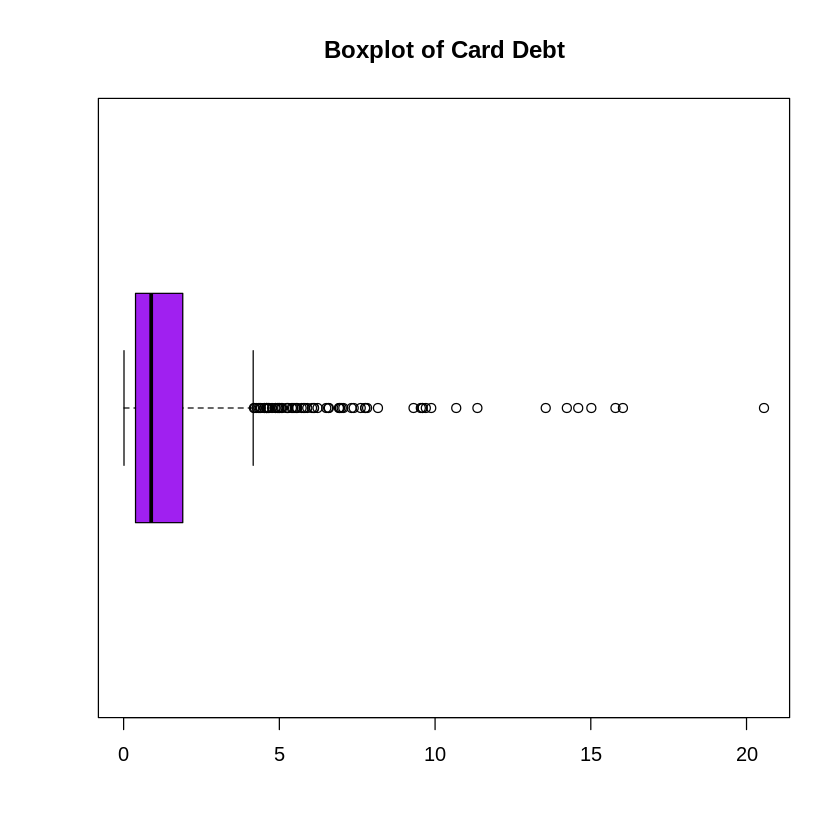

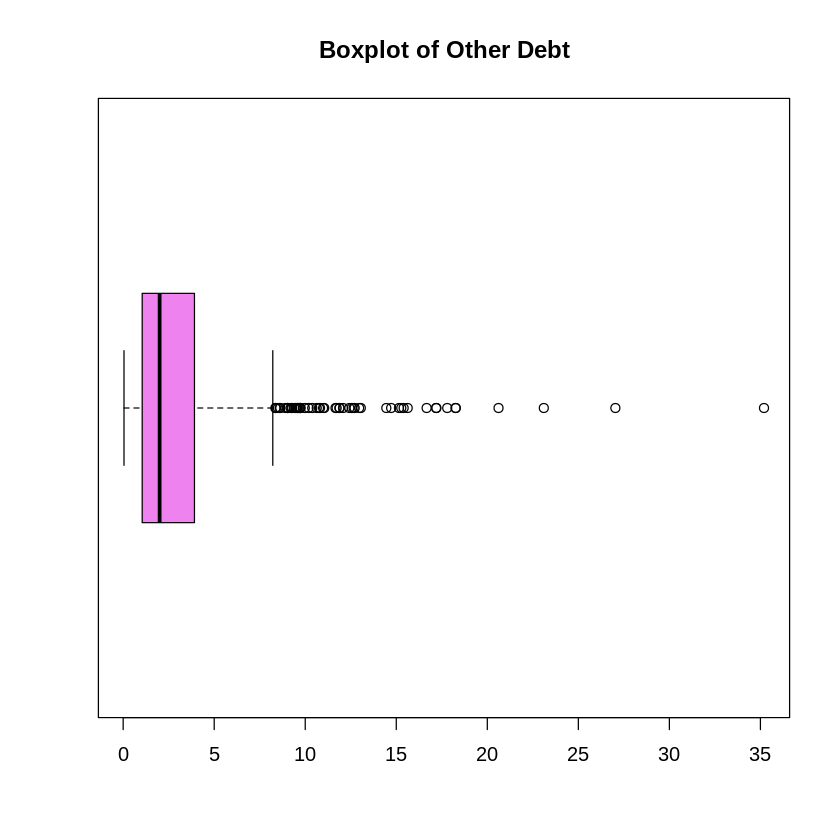

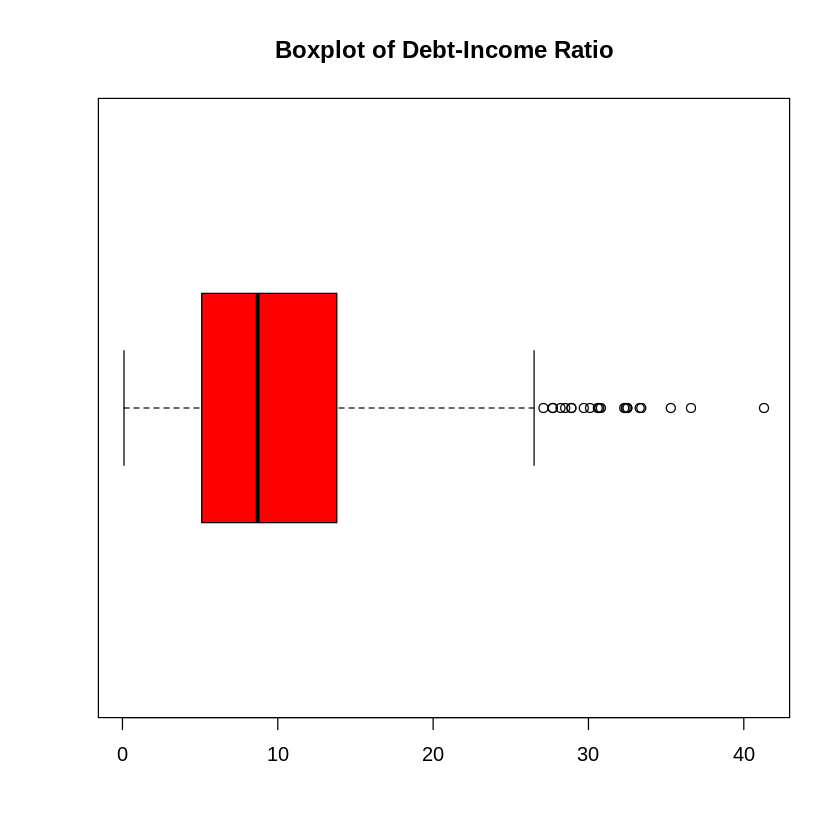

In [ ]:
#checking for outliers

#plotting boxplots for all the numerical variables

#par(mfrow=c(1,1))   
#The par() function allows to set parameters to the plot. 
#The mfrow() parameter allows to split the screen in several panels. Subsequent charts will be drawn in panels.

boxplot((df_1$Age), horizontal = TRUE, col = 'red', main = "Boxplot of Age")

boxplot((df_1$`Years Employed`), horizontal = TRUE, col = 'red', main = "Boxplot of Years Employed")

boxplot((df_1$Income), horizontal = TRUE, col = 'cyan', main = "Boxplot of Income")

boxplot((df_1$`Card Debt`), horizontal = TRUE, col = 'purple', main = "Boxplot of Card Debt")

boxplot((df_1$`Other Debt`), horizontal = TRUE, col = 'violet', main = "Boxplot of Other Debt")

boxplot((df_1$DebtIncomeRatio), horizontal = TRUE, col = 'red', main = "Boxplot of Debt-Income Ratio")


Observations 
* There are outliers observed across all numerical variables except for age. 

#5. Univariate Analysis

In [ ]:
#obtaining the statistical properties of the variables - uses the #library(psych)
describe(df_1)

vars n   mean       sd          median  trimmed    mad        
Customer Id      1   850 425.500000 245.5181595 425.500 425.500000 315.0525000
Age              2   850  35.029412   8.0414316  34.000  34.688235   8.8956000
Edu*             3   850   1.710588   0.9277839   1.000   1.551471   0.0000000
Years Employed   4   850   8.565882   6.7778836   7.000   7.889706   7.4130000
Income           5   850  46.675294  38.5430538  35.000  39.425000  19.2738000
Card Debt        6   850   1.576820   2.1258433   0.885   1.137743   0.8991969
Other Debt       7   850   3.078773   3.3987988   2.003   2.420160   1.6790445
Defaulted*       8   850   1.257647   0.4375961   1.000   1.197059   0.0000000
Address*         9   850   9.363529   6.8679853   8.000   8.560294   7.4130000
DebtIncomeRatio 10   850  10.171647   6.7194413   8.700   9.409118   6.2269200
                min    max     range   skew      kurtosis   se        
Customer Id      1.000 850.000 849.000 0.0000000 -1.2042361 8.42120340
Age             20.000  56.000  36.000 0.3338550 -0.6662399 0.27581883
Edu*             1.000   5.000   4.000 1.2125544  0.6989917 0.03182272
Years Employed   0.000  33.000  33.000 0.8596206  0.3619988 0.23247949
Income          13.000 446.000 433.000 3.6877100 22.2870564 1.32201584
Card Debt        0.012  20.561  20.549 3.6887351 19.3249246 0.07291582
Other Debt       0.046  35.197  35.151 3.1946995 16.4843141 0.11657784
Defaulted*       1.000   2.000   1.000 1.1063528 -0.7768934 0.01500942
Address*         1.000  32.000  31.000 0.8960352  0.1236604 0.23556995
DebtIncomeRatio  0.100  41.300  41.200 1.1210315  1.3622117 0.23047493

In [ ]:
# obtaining the statistical summary of the data
summary(df_1)

  Customer Id         Age        Edu     Years Employed       Income      
 Min.   :  1.0   Min.   :20.00   1:460   Min.   : 0.000   Min.   : 13.00  
 1st Qu.:213.2   1st Qu.:29.00   2:235   1st Qu.: 3.000   1st Qu.: 24.00  
 Median :425.5   Median :34.00   3:101   Median : 7.000   Median : 35.00  
 Mean   :425.5   Mean   :35.03   4: 49   Mean   : 8.566   Mean   : 46.68  
 3rd Qu.:637.8   3rd Qu.:41.00   5:  5   3rd Qu.:13.000   3rd Qu.: 55.75  
 Max.   :850.0   Max.   :56.00           Max.   :33.000   Max.   :446.00  
   Card Debt         Other Debt     Defaulted   Address         
 Min.   : 0.0120   Min.   : 0.046   0:631     Length:850        
 1st Qu.: 0.3825   1st Qu.: 1.046   1:219     Class :character  
 Median : 0.8850   Median : 2.003             Mode  :character  
 Mean   : 1.5768   Mean   : 3.079                               
 3rd Qu.: 1.8985   3rd Qu.: 3.903                               
 Max.   :20.5610   Max.   :35.197                               
 DebtIncomeRatio
 Mi

#Histograms

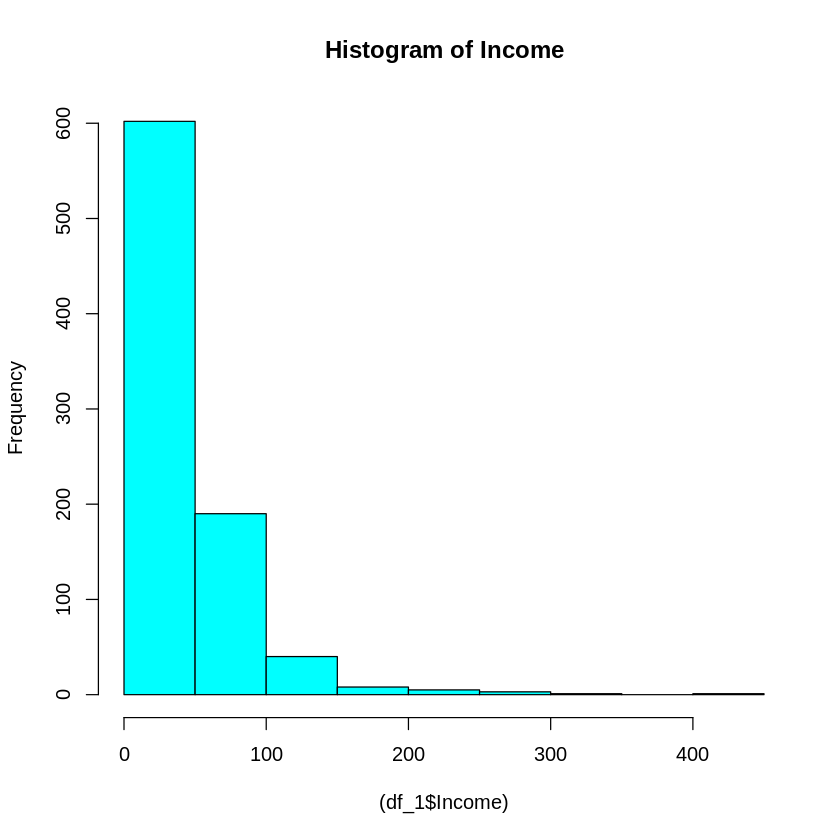

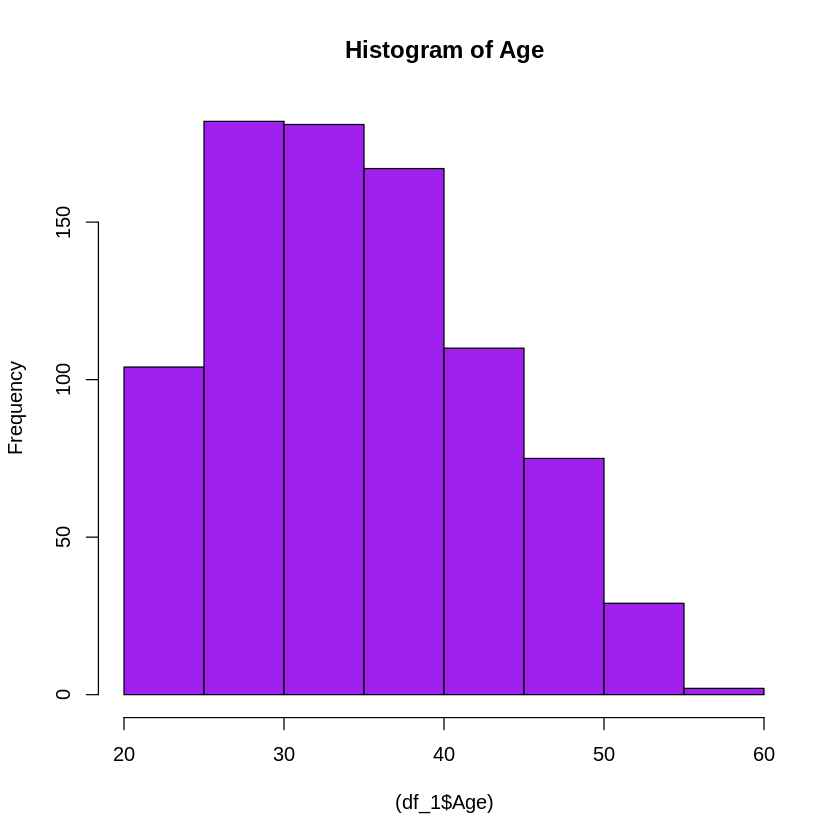

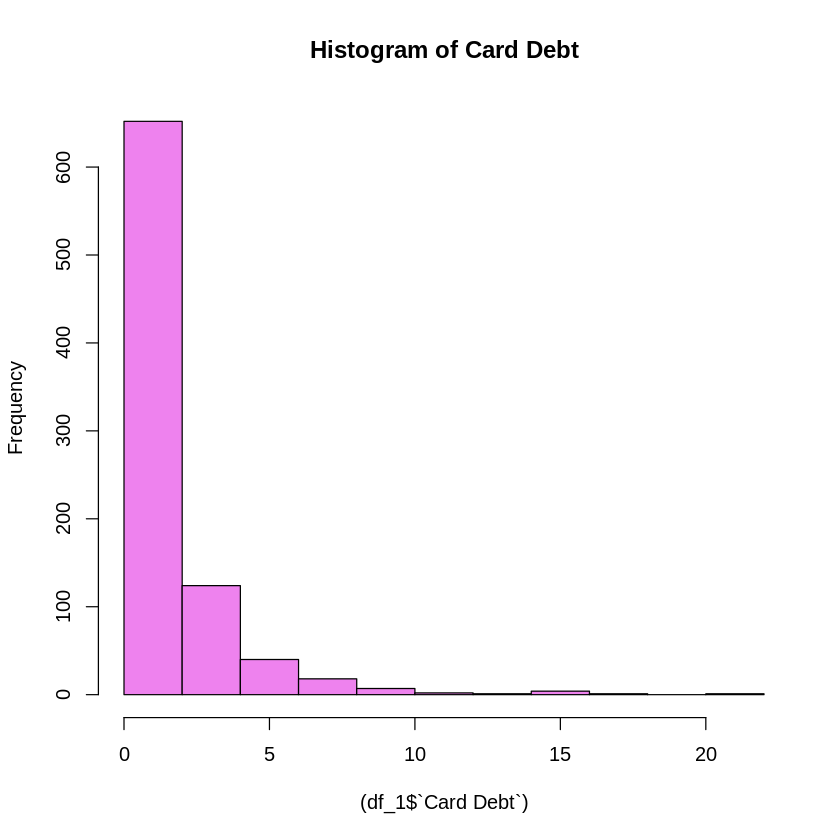

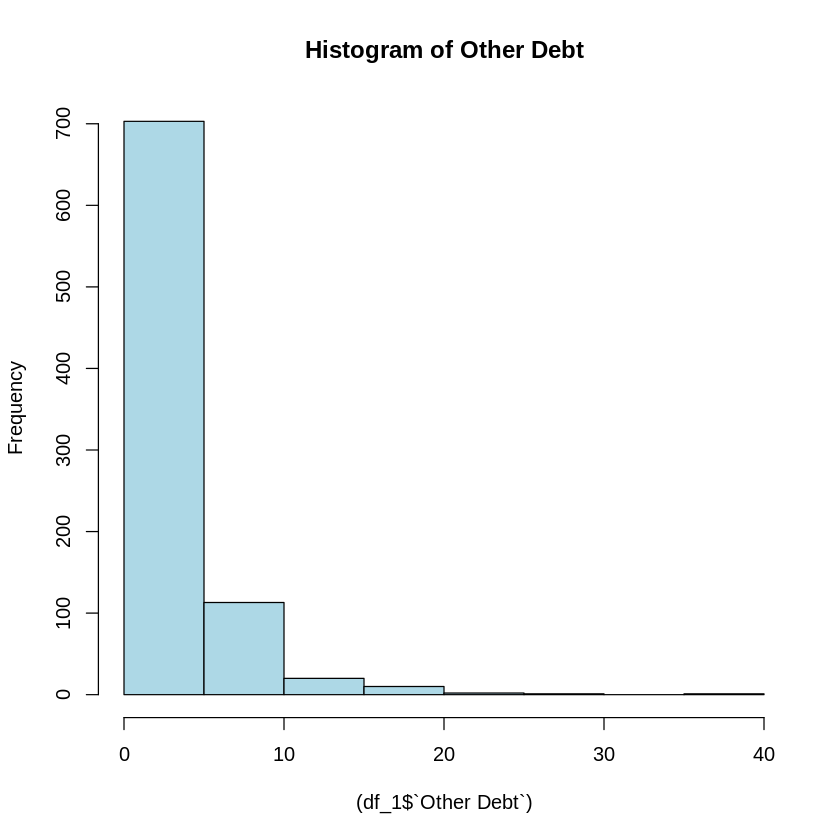

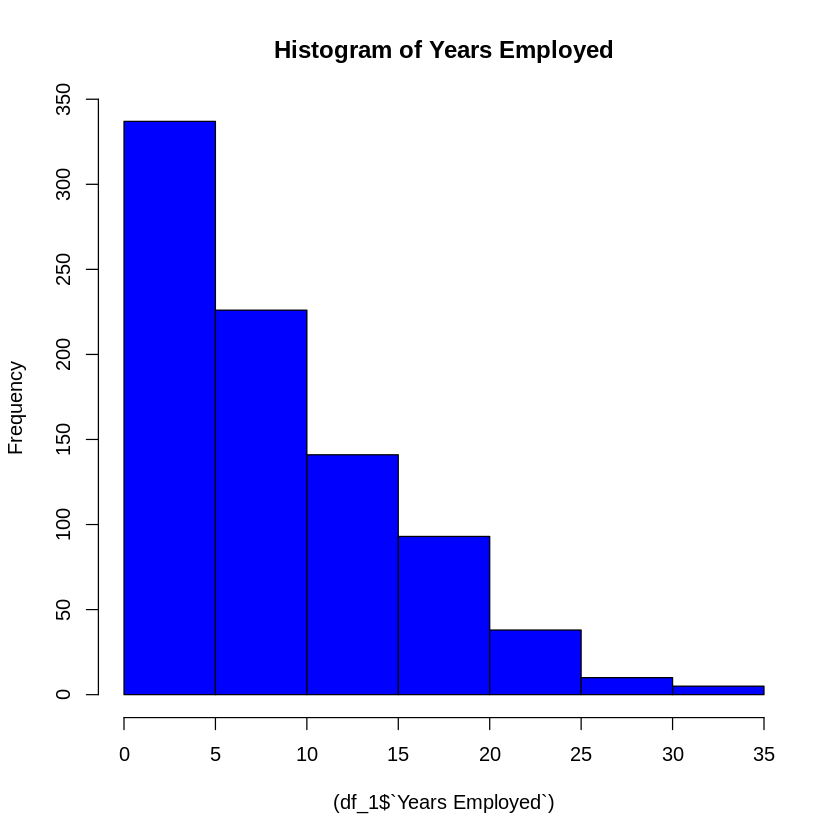

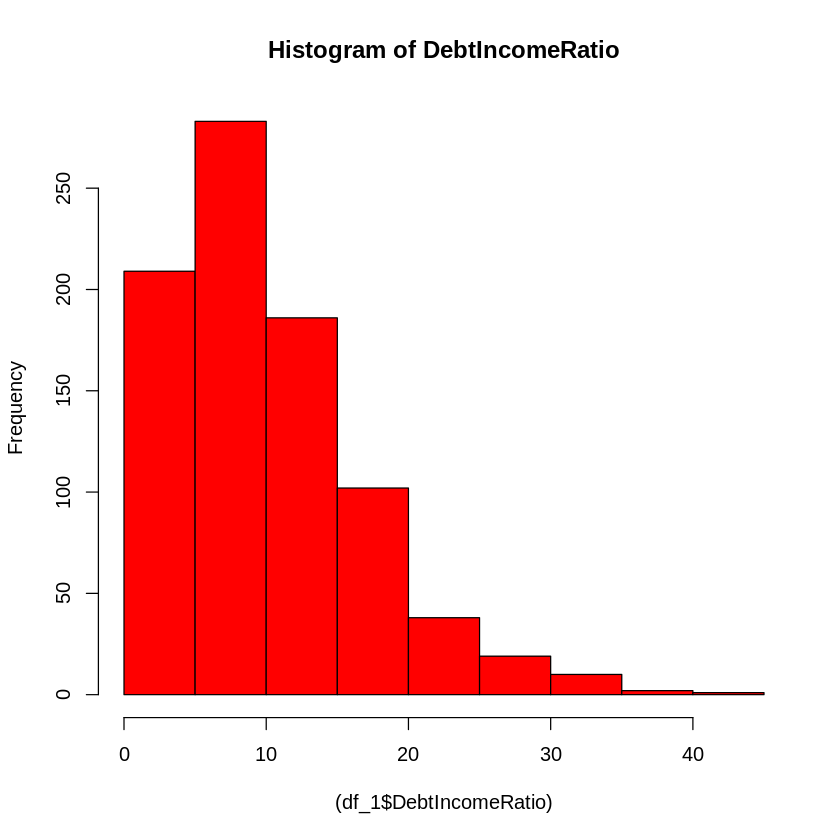

In [ ]:
#plotting multiple histograms of the numerical variables
# par(mfrow=c(2,2))

#histogram of Income
hist((df_1$Income), col = 'cyan', main = "Histogram of Income")

#histogram of Age
hist((df_1$Age), col = 'purple', main = "Histogram of Age")

#histogram of Card Debt
hist((df_1$`Card Debt`), col = 'violet', main = "Histogram of Card Debt")

#histogram of Other Debt
hist((df_1$`Other Debt`), col = 'lightblue', main = "Histogram of Other Debt")

#histogram of Defaulted
hist((df_1$`Years Employed`), col = 'blue', main = "Histogram of Years Employed")

#histogram of Defaulted
hist((df_1$DebtIncomeRatio), col = 'red', main = "Histogram of DebtIncomeRatio")

Observations:
* All the variables are positively skewed except for Age which seems to have a gaussian distribution. 

# Bar Charts

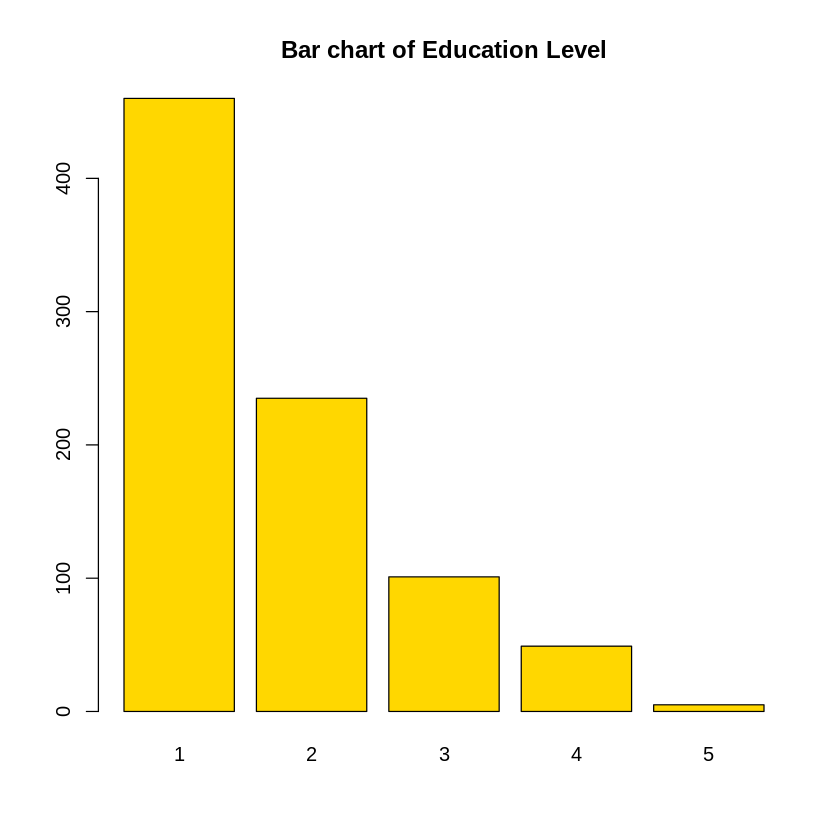

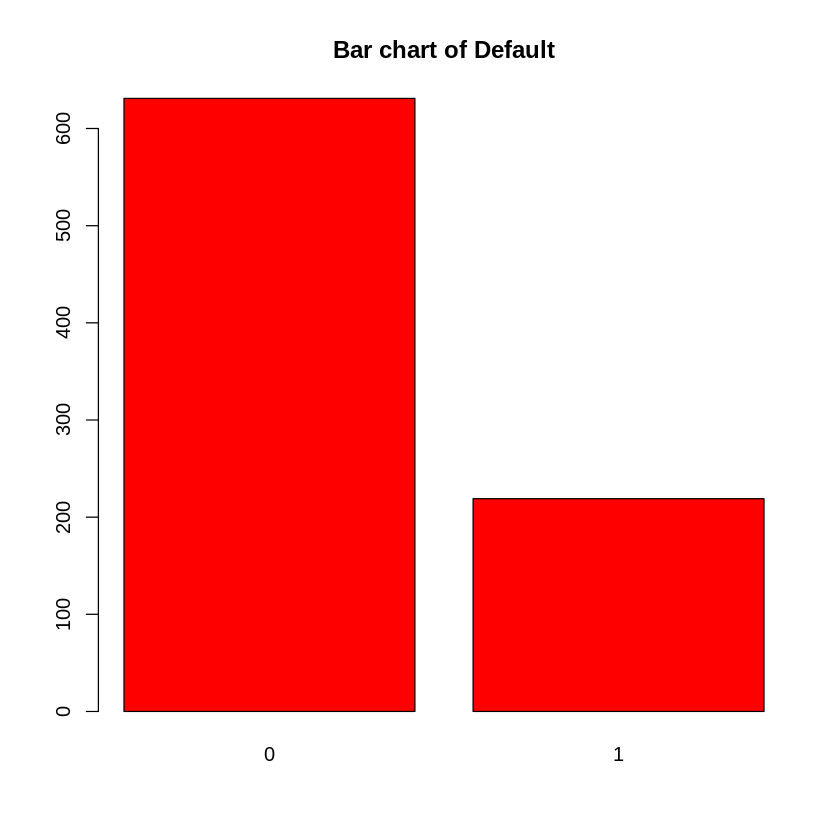

In [ ]:
# We will plot bar charts for factor features i.e Edu and Defaulted 

Education_level <-df_1$Edu                            #fetching education level
Education_level_frequency<- table(Education_level)    #creating a frequency table

default <-df_1$Defaulted                            #fetching default status
default_frequency<- table(default)                   #creating a frequency table

# Plotting bar charts using the frequency tables 

#par(mfrow=c(2,2))
barplot((Education_level_frequency), col = "gold", main = "Bar chart of Education Level")

#par(mfrow=c(2,2))
barplot((default_frequency), col = "red", main = "Bar chart of Default")

Observations:
* Most customers have not attained the highest level of education
* Most of the customers pay their debts (0 - not defaulters)

#6. Bivariate Analysis

###**Correlation**

In [ ]:
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
head(df_1)

Customer Id Age Edu Years Employed Income Card Debt Other Debt Defaulted
1 1           41  2    6              19    0.124     1.073      0        
2 2           47  1   26             100    4.582     8.218      0        
3 3           33  2   10              57    6.111     5.802      1        
4 4           29  2    4              19    0.681     0.516      0        
5 5           47  1   31             253    9.308     8.908      0        
6 6           40  1   23              81    0.998     7.831      0        
  Address DebtIncomeRatio
1 NBA001   6.3           
2 NBA021  12.8           
3 NBA013  20.9           
4 NBA009   6.3           
5 NBA008   7.2           
6 NBA016  10.9

In [ ]:
#creating a dataframe of all the numerical columns
age<- df_1$Age
experience<- df_1$`Years Employed`
income <- df_1$Income
carddebt <- df_1$`Card Debt`
otherdebt <- df_1$`Other Debt`
debtratio <- df_1$DebtIncomeRatio

In [ ]:
numerical <- data.frame(age, experience, income, carddebt, otherdebt, debtratio)
head(numerical)

age experience income carddebt otherdebt debtratio
1 41   6          19    0.124    1.073      6.3     
2 47  26         100    4.582    8.218     12.8     
3 33  10          57    6.111    5.802     20.9     
4 29   4          19    0.681    0.516      6.3     
5 47  31         253    9.308    8.908      7.2     
6 40  23          81    0.998    7.831     10.9

In [ ]:
#calculating a correlation matrix of the dataframe created 

corr <- round(cor(numerical), 1) #numerical matrix to 1 decimal point
head(corr[, 1:6])  #previewing the matrix

age experience income carddebt otherdebt debtratio
age        1.0 0.6        0.5    0.3      0.3       0.0      
experience 0.6 1.0        0.6    0.4      0.4       0.0      
income     0.5 0.6        1.0    0.6      0.6       0.0      
carddebt   0.3 0.4        0.6    1.0      0.6       0.5      
otherdebt  0.3 0.4        0.6    0.6      1.0       0.6      
debtratio  0.0 0.0        0.0    0.5      0.6       1.0

Observation:
* Age has a positive correlation with all variables except for debtincome ratio which has zero correlation
* There is no correlation between debtincome ratio and income, experience and age
* There is a positive correlation between income and age, experience and debt (credit and other debt)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


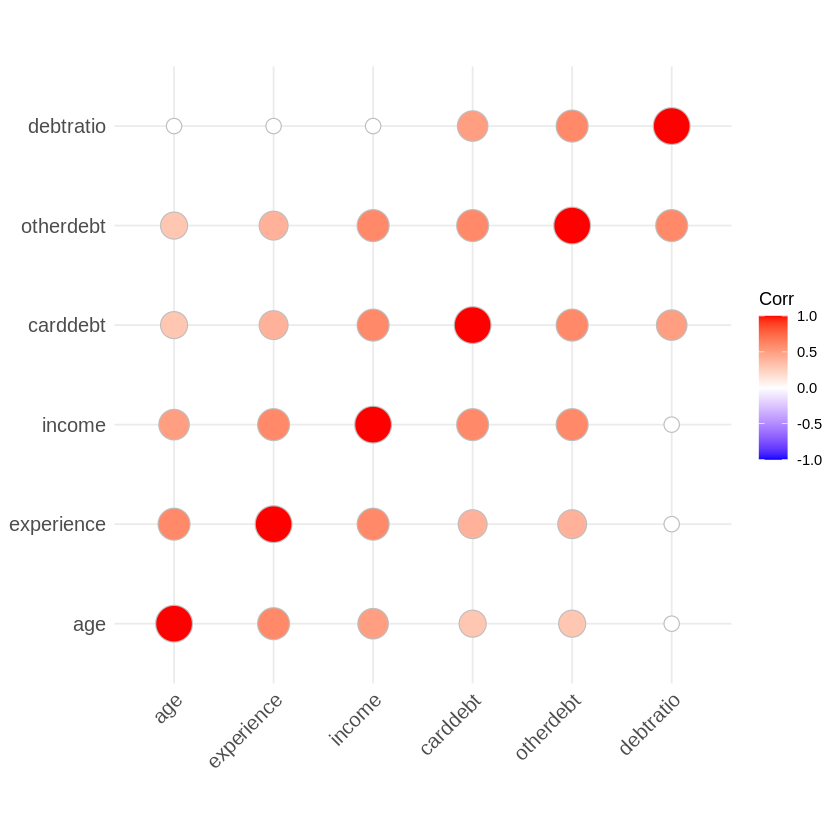

In [ ]:
#correlation matrix - visualization 
install.packages('ggcorrplot')
library(ggcorrplot)
ggcorrplot(corr, method = "circle")

The deeper the color, the higher the level of correlation between variables

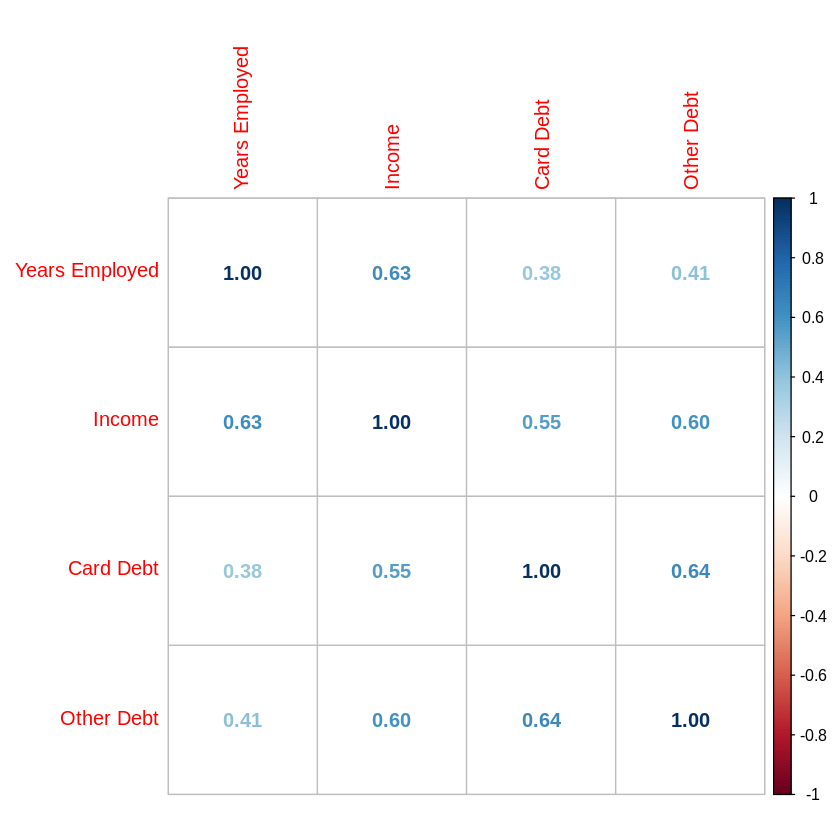

In [ ]:
# Further visualization of correlation among some variables 
corrmatrix <- cor(df_1[,4:7])
corrplot(corrmatrix, method = 'number')

Labelled correlations among select variables

###**Boxplots**

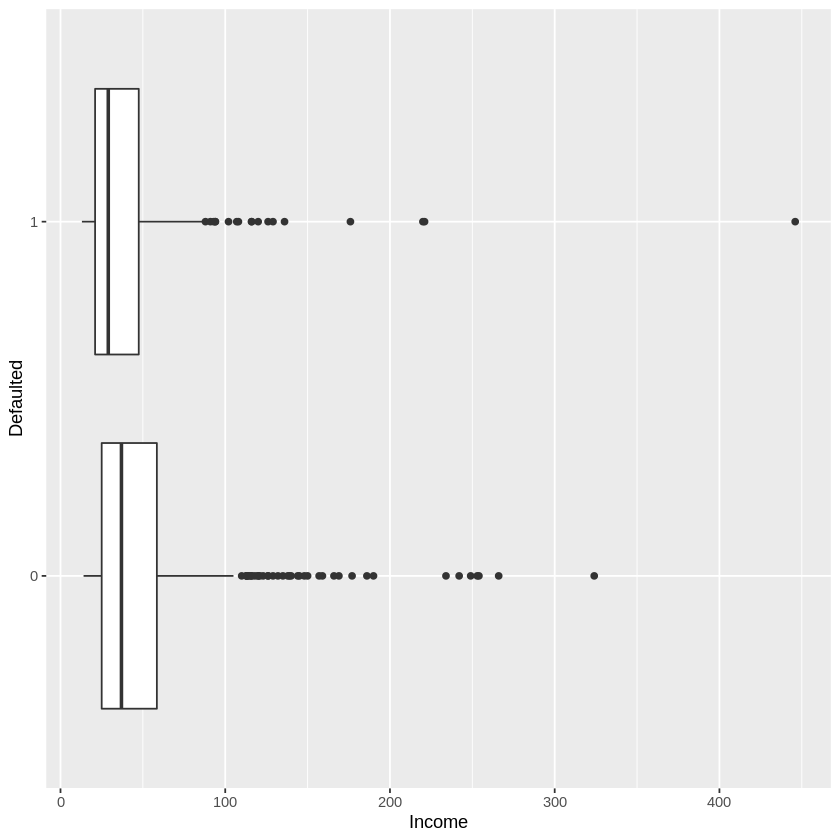

In [ ]:
#Finding out how do all the variables relate with debt defaulting

#plotting boxplots to show how the Default relates with the income
ggplot(data = df_1, mapping = aes(x = Income, y = Defaulted, fill = Income)) + 
  geom_boxplot()

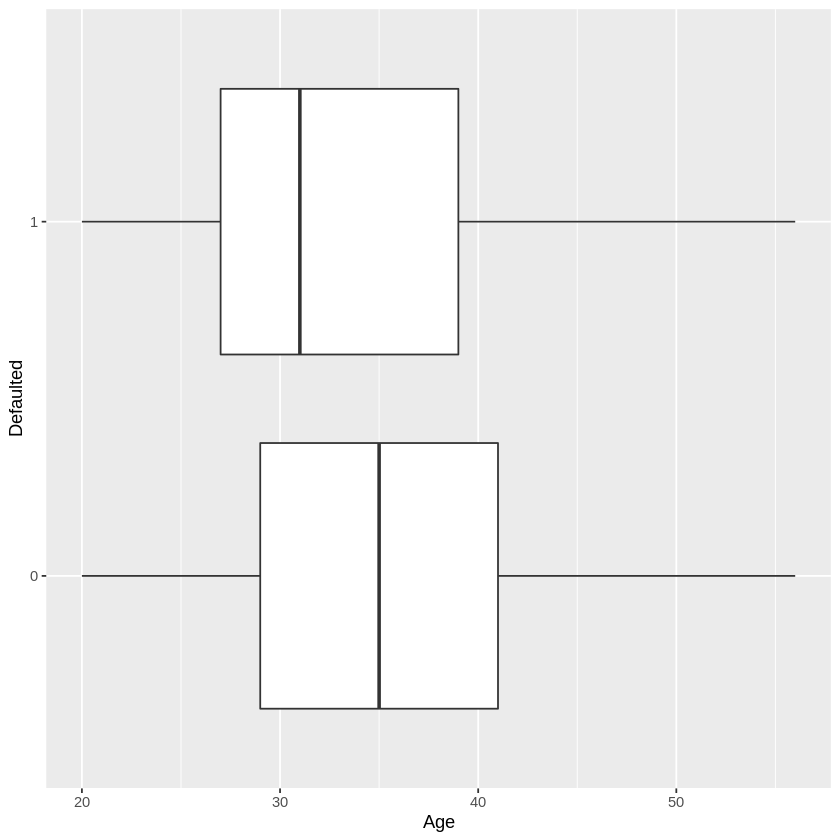

In [ ]:
#plotting boxplots to show how the Default relates with the Age
ggplot(data = df_1, mapping = aes(x = Age, y = Defaulted, fill = Age)) + 
  geom_boxplot()

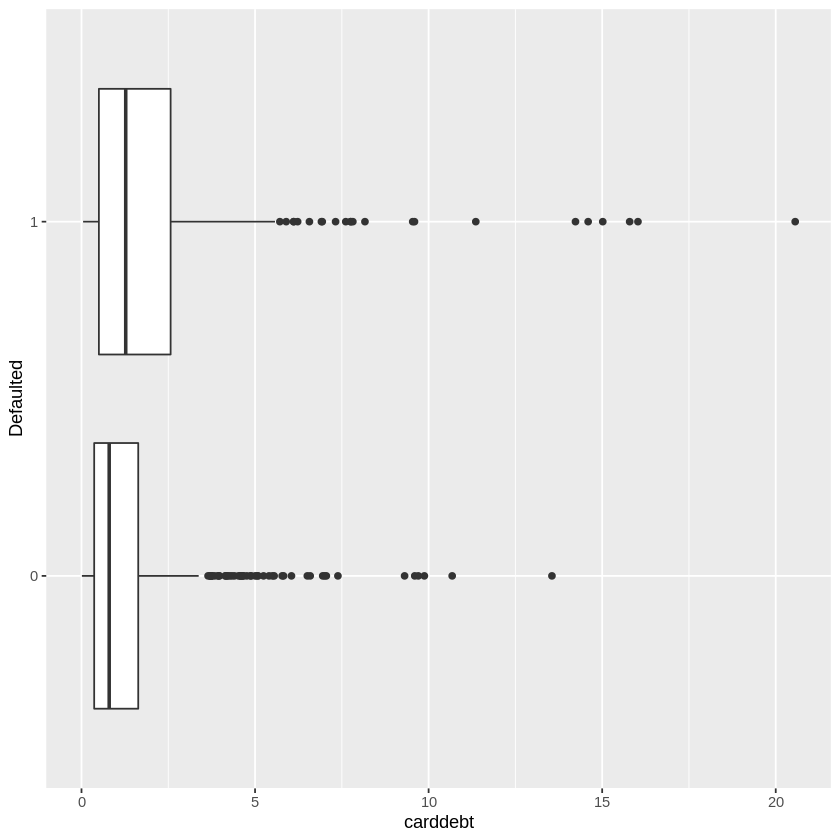

In [ ]:
#plotting boxplots to show how the Default relates with the Credit Debt
ggplot(data = df_1, mapping = aes(x = carddebt, y = Defaulted, fill = carddebt)) + 
  geom_boxplot()

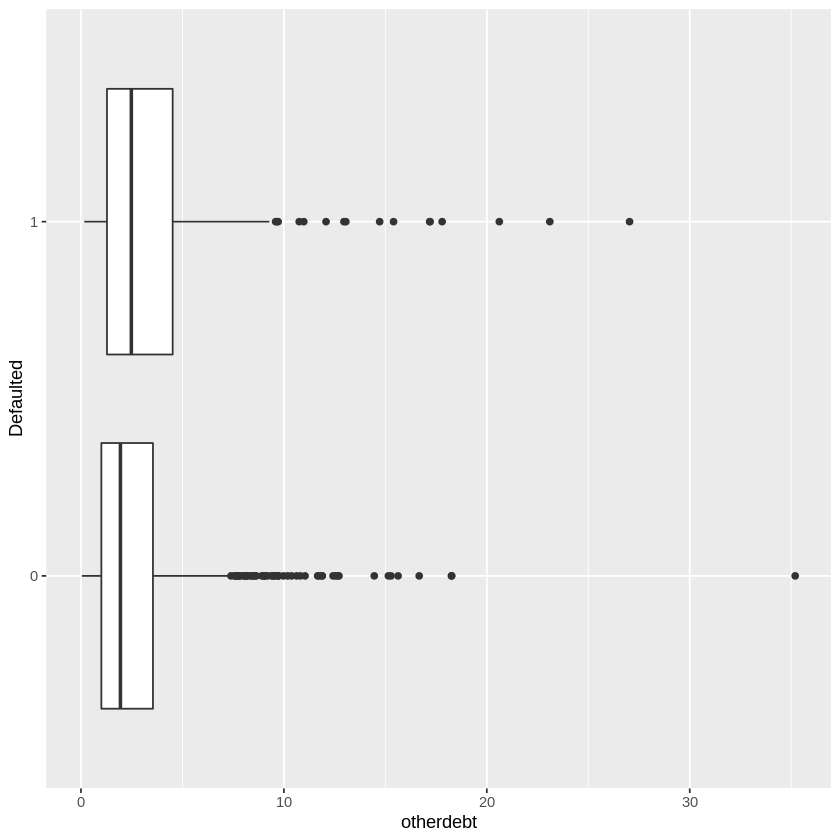

In [ ]:
#plotting boxplots to show how the Default relates with the Other debt
ggplot(data = df_1, mapping = aes(x = otherdebt, y = Defaulted, fill = otherdebt)) + 
  geom_boxplot()

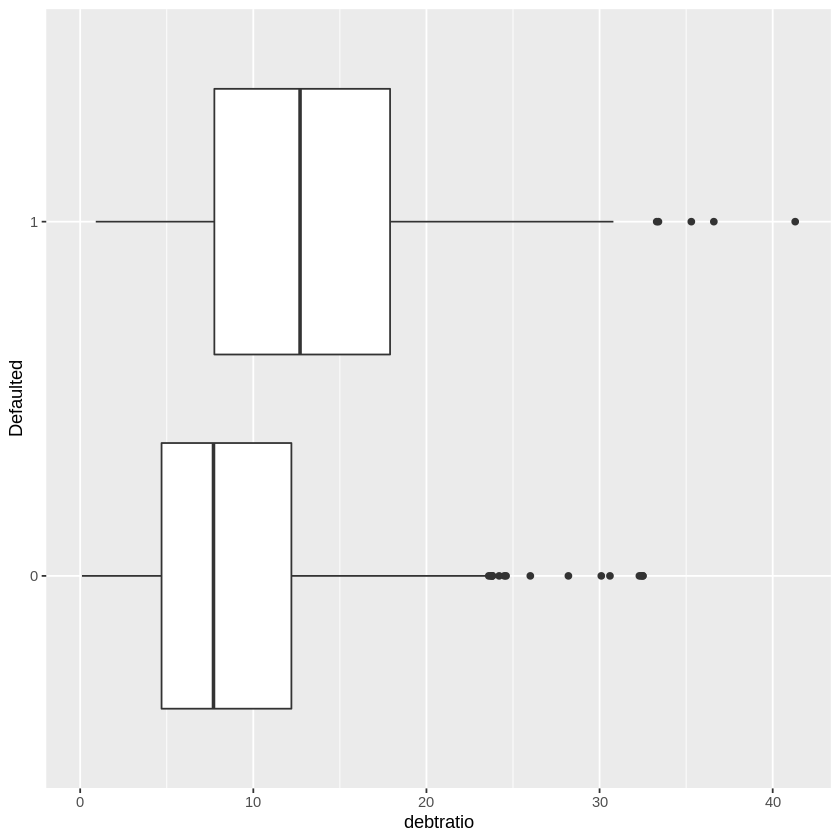

In [ ]:
#plotting boxplots to show how the Default relates with the debt-income ratio
ggplot(data = df_1, mapping = aes(x = debtratio, y = Defaulted, fill = debtratio)) + 
  geom_boxplot()

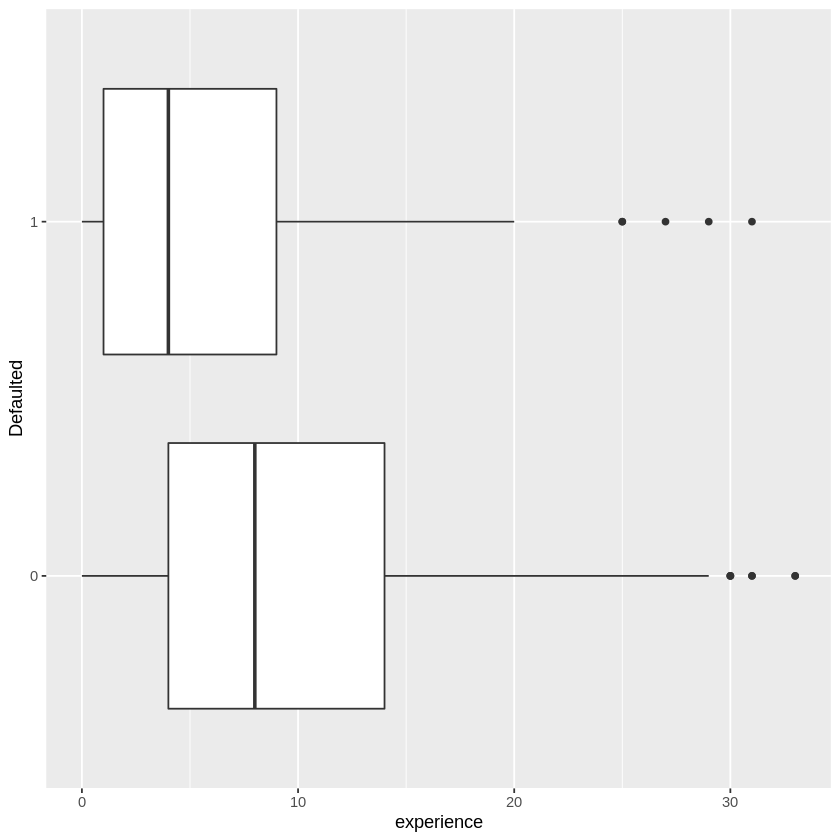

In [ ]:
#plotting boxplots to show how the Default relates with the debt-income ratio
ggplot(data = df_1, mapping = aes(x = experience, y = Defaulted, fill = experience)) + 
  geom_boxplot()

Observation:
* From the boxplots, distribution of data is positively skewed except for age 

###**Barplot**

In [ ]:
library(ggplot2)
install.packages('plotly')
library(plotly)

Warning message:
“Ignoring unknown aesthetics: position”


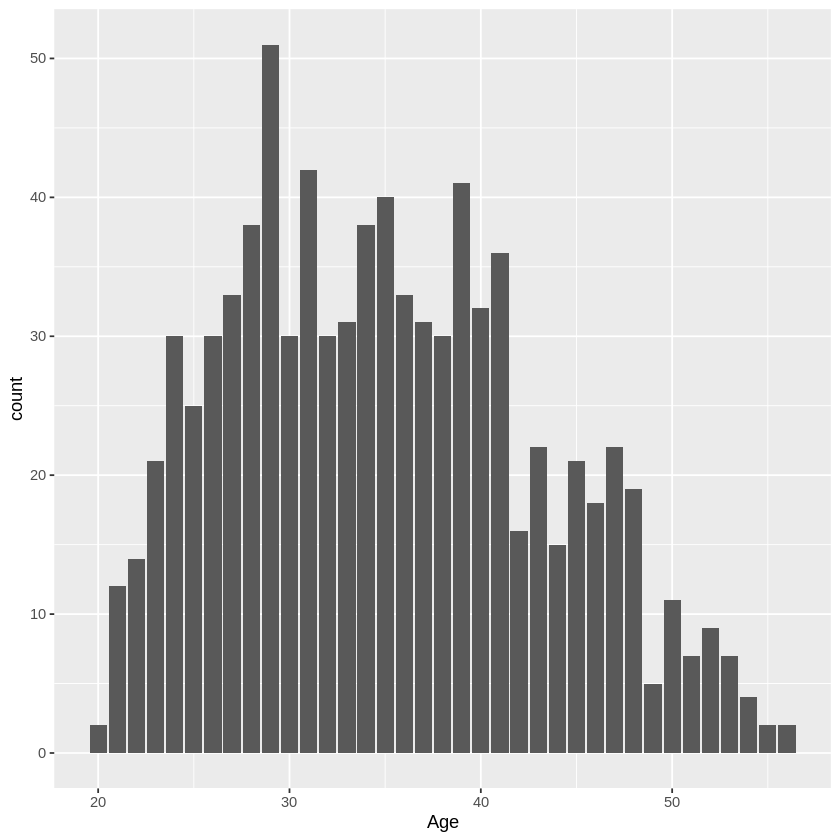

In [ ]:
#barplot showing how different age groups earn
ggplot(data = df_1)+
  geom_bar(mapping = aes(x = Age, fill = Income, position = "dodge"))

Warning message:
“Ignoring unknown aesthetics: position”


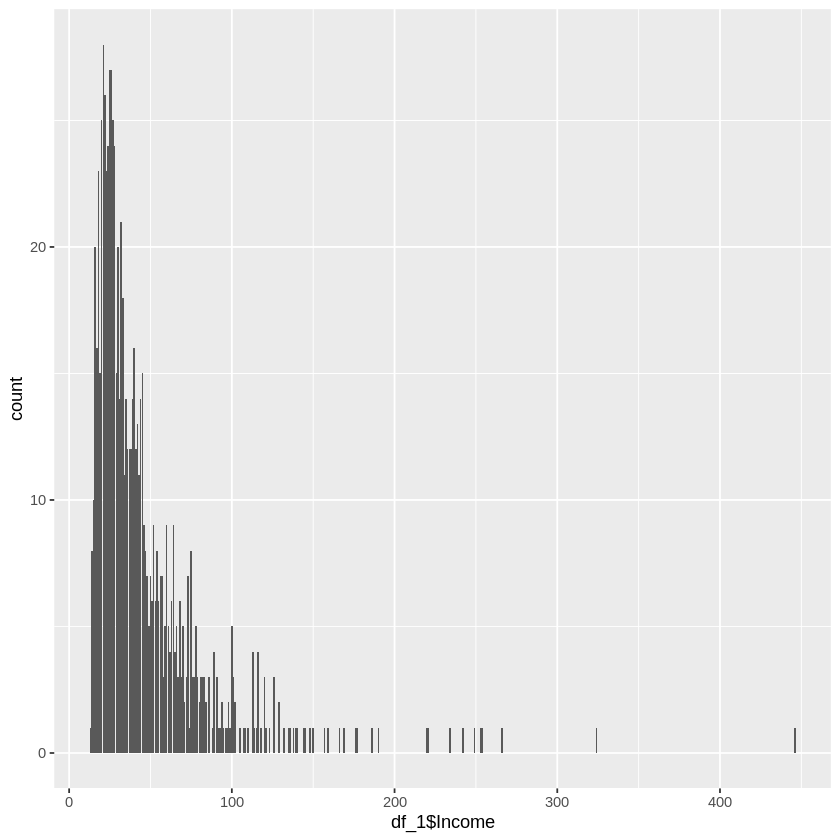

In [ ]:
#barplot showing how income relate with debtincome ratio
ggplot(data = df_1) + 
  geom_bar(mapping = aes(x = df_1$Income, fill = df_1$DebtIncomeRatio,position = "dodge"))

Warning message:
“Ignoring unknown aesthetics: position”


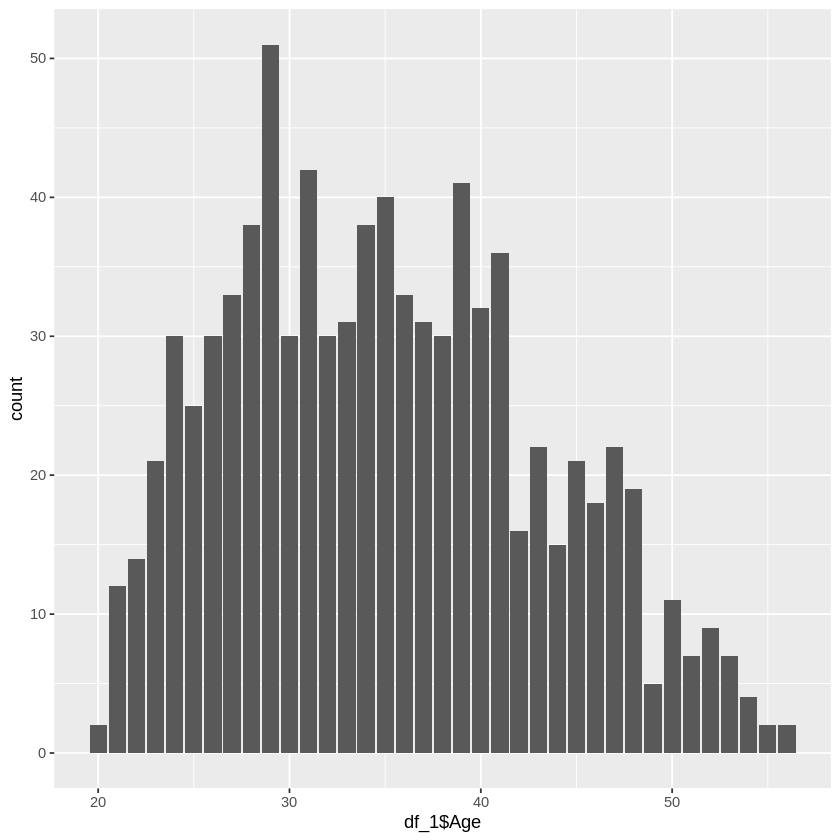

In [ ]:
#barplot showing how age relate with card debt
ggplot(data = df_1) + 
  geom_bar(mapping = aes(x = df_1$Age, fill = df_1$`Card Debt`,position = "dodge"))

###**Scatter Plots**



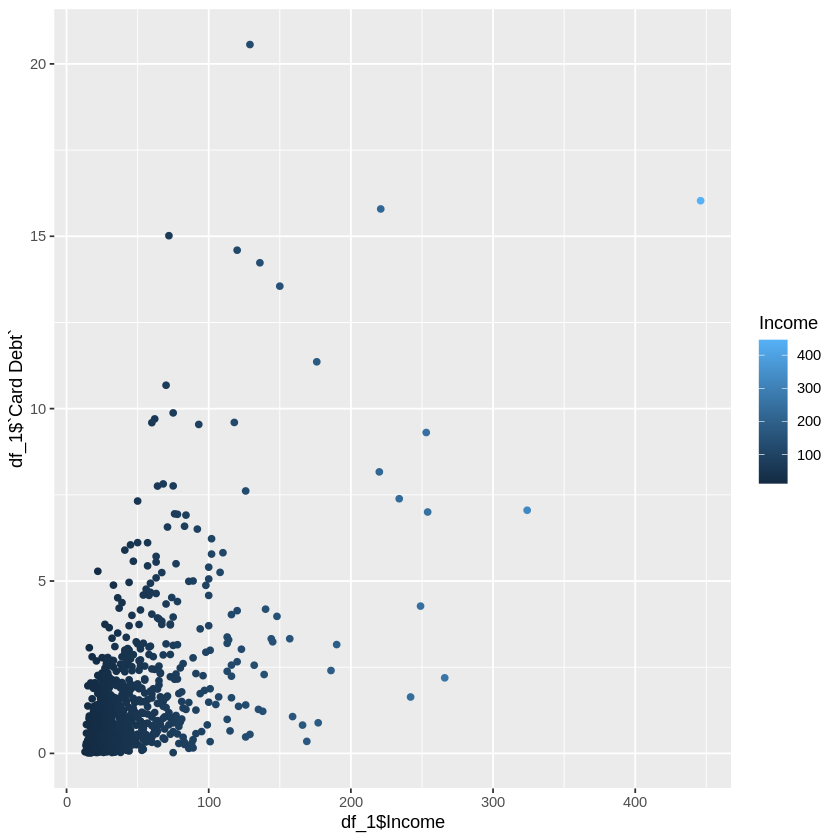

In [ ]:
#scatter plots to assess the linear relationships of the numerical variables

#scatter plot of Income and the card debt 
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = df_1$Income, y = df_1$`Card Debt`, color = Income)) 

Observation:
Customers with lower income have more card debt as compared to customers with higher income

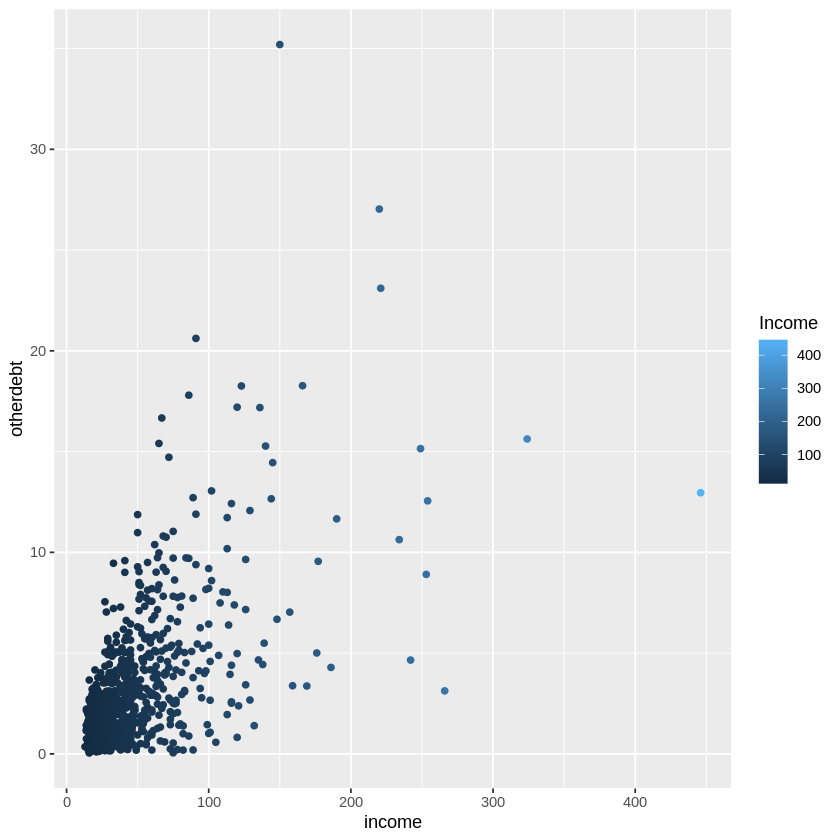

In [ ]:
#scatter plot of Income and the other debt 
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = income, y = otherdebt, color = Income)) 

Observation:
Customers with lower income have more 'other debt' as compared to customers with higher income

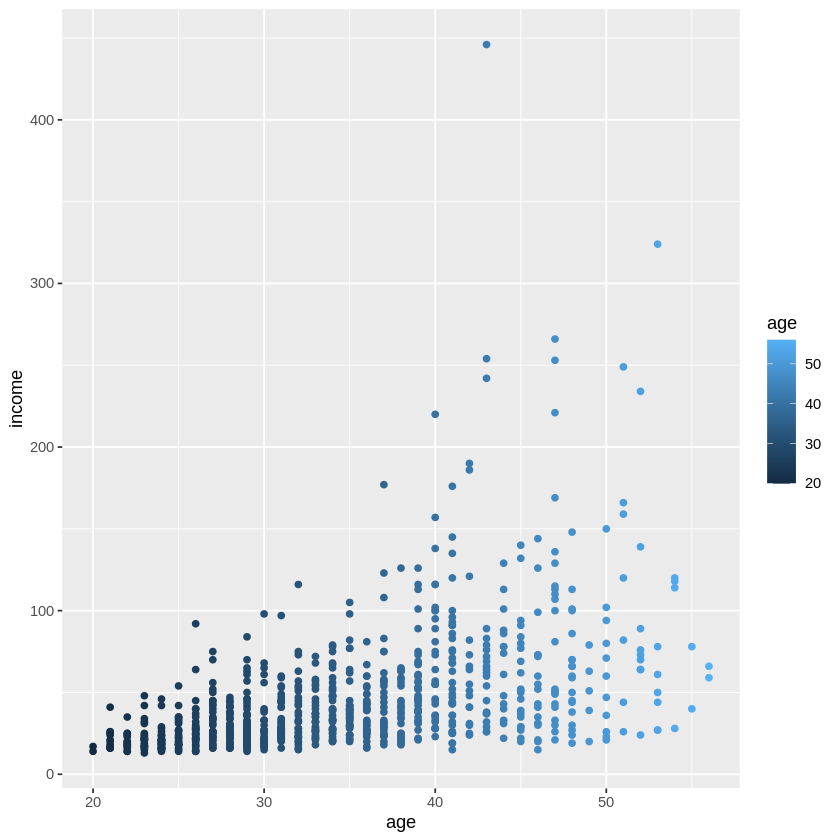

In [ ]:
#scatter plot of Income and the age 
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = age, y = income , color = age)) 

Observation:

Age and income have a positive relationship. Customers above 40 years of age earn more than those below 40 years

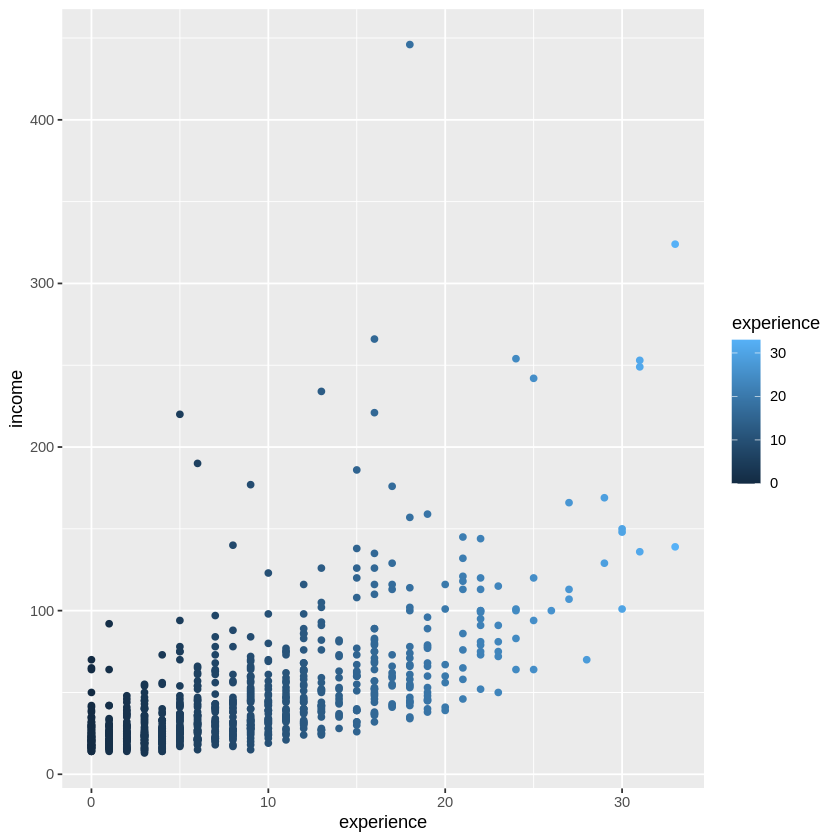

In [ ]:
#scatter plot of Income and the experience
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = experience, y = income , color = experience)) 

Experience and income have a positive relationship. Customers with more than 20 years of experience earn more than those below 20 years of experience

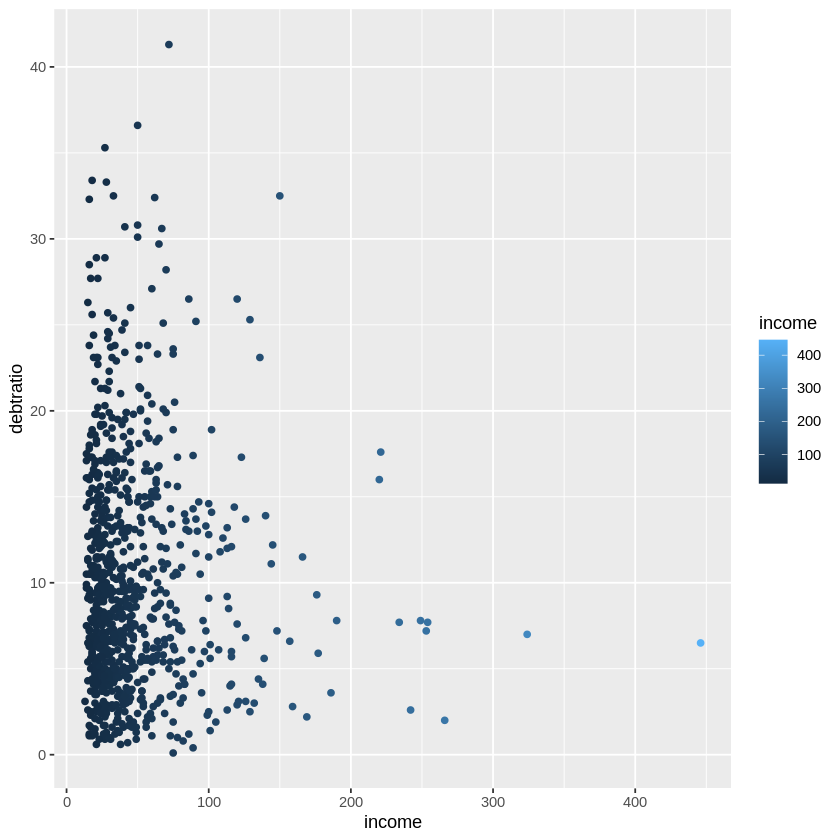

In [ ]:
#scatter plot of Income and debt income ratio 
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = income, y = debtratio , color = income)) 

Low income customers tend to have a higher debt income ration as compared to those with higher income

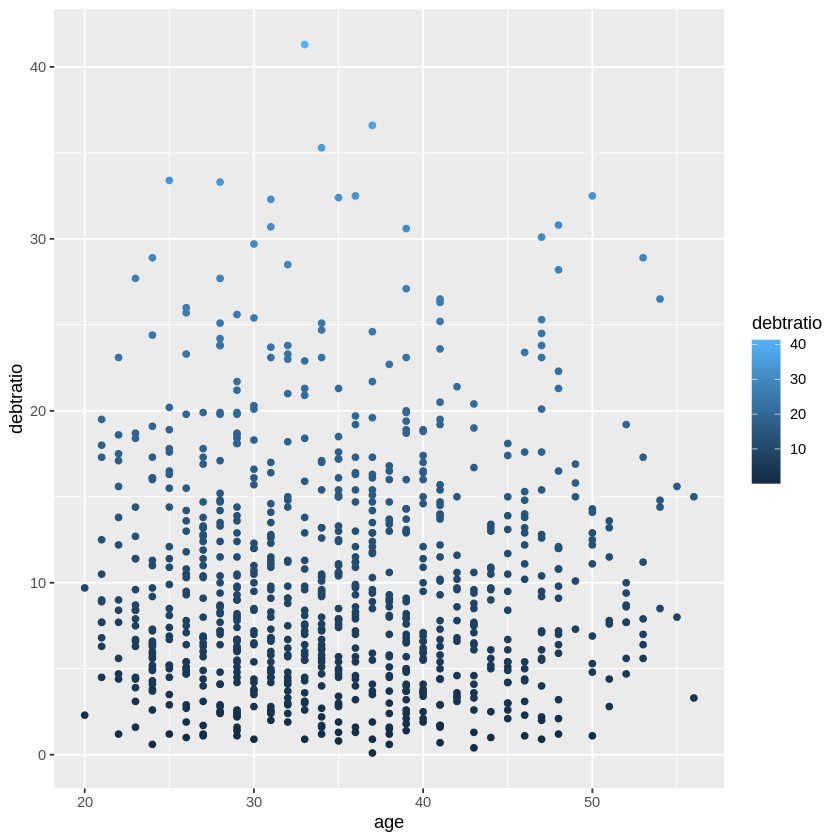

In [ ]:
#scatter plot of age and the debt income 
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = age, y = debtratio , color = debtratio)) 

Customers between 20-39 years of age have a higher debt income ratio compared to those above 40 years of age

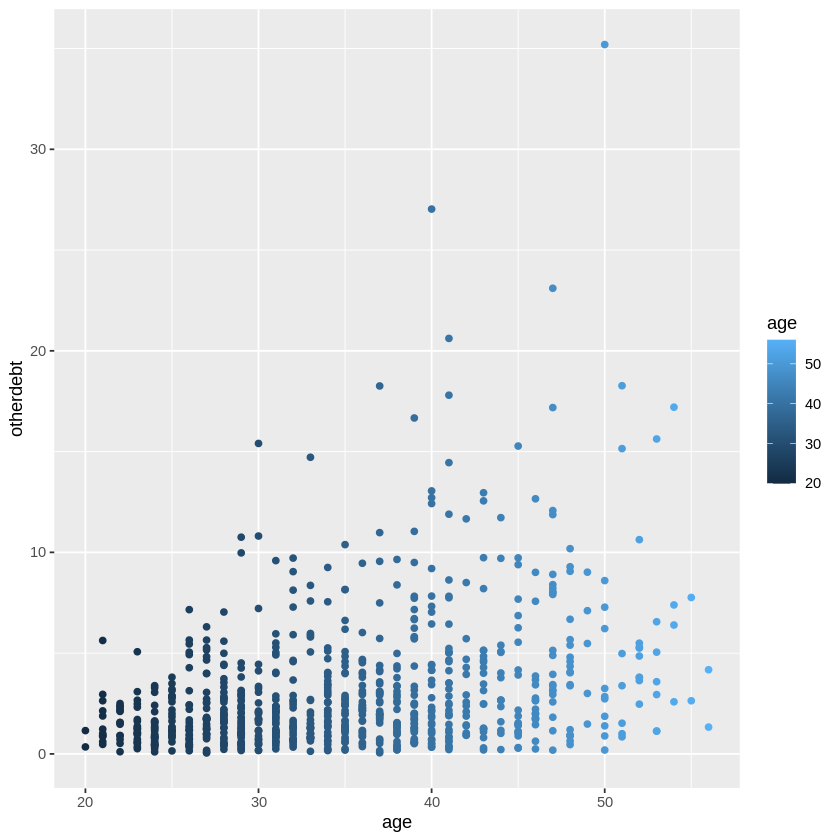

In [ ]:
#scatter plot of how age and other debt relate
ggplot(data = df_1) + 
  geom_point(mapping = aes (x = age, y = otherdebt , color = age)) 

Customers between 20-39 years of age have a higher 'other debt' compared to those above 40 years of age

In [ ]:
install.packages('GGally')
library(GGally)

#7.Implementing the Solution

###Data Pre-processing

In [ ]:
install.packages('plyr')
library(plyr)
library(dplyr)
library(caret)

In [ ]:
#Converting factor variables to ordinal features

# View the order of Edu Variable
print(table(df_1$Edu))


  1   2   3   4   5 
460 235 101  49   5 


In [ ]:
#checking the levels in Edu variable
df_1$Edu <- factor(df_1$Edu, order= TRUE, levels = c(1,2,3,4,5))
print(df_1$Edu)

  [1] 2 1 2 2 1 1 2 3 1 3 3 2 1 1 3 1 1 4 1 1 2 3 3 1 4 1 1 1 2 2 3 2 2 3 1 2 3
 [38] 1 1 3 1 3 2 5 1 3 1 1 1 2 1 1 1 1 3 1 1 3 1 1 1 1 1 2 2 1 1 1 1 1 3 4 2 2
 [75] 1 1 1 2 2 2 1 3 3 1 2 1 4 2 2 4 2 2 1 1 3 2 1 1 2 3 1 4 1 1 2 1 1 1 2 3 1
[112] 4 1 1 1 2 1 1 2 1 2 2 4 2 1 1 2 2 1 1 1 1 2 3 1 4 2 1 1 2 2 2 2 1 1 3 1 3
[149] 2 2 1 1 3 1 2 1 1 1 2 3 1 3 2 1 2 4 3 1 1 4 2 1 3 3 1 1 1 1 2 1 2 2 1 1 3
[186] 2 1 1 1 4 1 1 3 2 2 3 2 1 3 3 1 2 3 1 1 1 2 1 1 4 1 1 1 4 1 1 2 4 1 1 2 3
[223] 2 4 1 1 3 1 3 1 1 1 1 1 1 1 1 2 3 2 1 1 1 1 1 1 1 1 4 4 1 3 1 2 3 2 1 1 1
[260] 1 1 4 2 3 1 1 1 3 1 1 2 1 1 2 2 1 2 3 1 2 1 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1
[297] 2 1 4 1 2 3 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 2 2 1 3 2 3 1 1 1 1 2 2 1 1 2 2
[334] 1 4 1 1 1 1 2 3 1 1 2 1 2 2 3 1 1 1 4 1 1 1 1 2 4 3 1 4 2 1 4 3 1 1 5 2 1
[371] 1 2 1 1 1 1 2 1 2 2 1 1 3 1 2 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 3 2
[408] 2 4 1 1 2 2 1 2 1 1 1 1 1 1 3 1 2 1 2 1 1 3 1 1 1 2 3 3 2 2 1 1 1 1 2 1 2
[445] 1 3 2 1 1 1 3 1 3 1 2 2 2 1 1 3 3 

In [ ]:
# View the order of Defaulted Variable
print(table(df_1$Defaulted))


  0   1 
631 219 


In [ ]:
#checking the levels in Defaulted variable
df_1$Defaulted <- factor(df_1$Defaulted, order= TRUE, levels = c(0,1))
print(df_1$Defaulted )

  [1] 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 [38] 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 [75] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0
[112] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
[149] 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1
[186] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0
[223] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
[260] 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[297] 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1
[334] 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
[371] 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1
[408] 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
[445] 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 

In [ ]:
print(unique(df_1$Address))

 [1] 1    21   13   9    8    16   6    11   10   3    0    19   5    4    22  
[16] 18   2    7    26   20   12   14   24   15   17   23   25   27   31   <NA>
[31] 34   29  
31 Levels: 1 < 21 < 13 < 9 < 8 < 11 < 10 < 0 < 4 < 5 < 22 < 18 < 2 < ... < 29


In [ ]:
#encoding character variable address
df_1$Address <- factor(df_1$Address, order = TRUE, levels =c('NBA001','NBA021','NBA013',
'NBA009','NBA008','NBA011','NBA010','NBA000','NBA004','NBA005','NBA022','NBA018',
'NBA002','NBA006','NBA007','NBA003','NBA026','NBA016','NBA019','NBA020','NBA012','NBA014','NBA015',
'NBA017','NBA023','NBA025','NBA027','NBA031','NBA024','NBA034','NBA029'))

df_1$Address_Numeric <-mapvalues(df_1$Address, from = c('NBA001','NBA021','NBA013',
'NBA009','NBA008','NBA011','NBA010','NBA000','NBA004','NBA005','NBA022','NBA018',
'NBA002','NBA006','NBA007','NBA003','NBA026','NBA016','NBA019','NBA020','NBA012','NBA014','NBA015',
'NBA017','NBA023','NBA025','NBA027','NBA031','NBA024','NBA034','NBA029'), to = c(001,021,013,009,008,011,010,000,004,005,022,018,002,006,007,
003,026,016,019,020,012,014,015,017,023,025,027,031,024,034,029))

In [ ]:
#normalizing numerical variables
#function to normalize
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

# subjecting the function to the variables
df_1$Income <- normalize(df_1$Income)
df_1$`Card Debt` <- normalize(df_1$`Card Debt`)
df_1$Age <- normalize(df_1$Age)
df_1$`Other Debt` <- normalize(df_1$`Other Debt`)
df_1$`Years Employed` <- normalize(df_1$`Years Employed`)
df_1$DebtIncomeRatio <- normalize(df_1$DebtIncomeRatio)

In [ ]:
#viewing the structure of the encoded variables
str(df_1)

Classes ‘data.table’ and 'data.frame':	850 obs. of  11 variables:
 $ Customer Id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age            : num  0.583 0.75 0.361 0.25 0.75 ...
 $ Edu            : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 2 2 1 1 2 3 1 3 ...
 $ Years Employed : num  0.182 0.788 0.303 0.121 0.939 ...
 $ Income         : num  0.0139 0.2009 0.1016 0.0139 0.5543 ...
 $ Card Debt      : num  0.00545 0.2224 0.2968 0.03256 0.45238 ...
 $ Other Debt     : num  0.0292 0.2325 0.1638 0.0134 0.2521 ...
 $ Defaulted      : Ord.factor w/ 2 levels "0"<"1": 1 1 2 1 1 1 1 1 1 1 ...
 $ Address        : Ord.factor w/ 31 levels "NBA001"<"NBA021"<..: 1 2 3 4 5 18 3 4 14 6 ...
 $ DebtIncomeRatio: num  0.15 0.308 0.505 0.15 0.172 ...
 $ Address_Numeric: Ord.factor w/ 31 levels "1"<"21"<"13"<..: 1 2 3 4 5 18 3 4 14 6 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
# Remove the address and customer id columns; to retain address numeric instead.

df_1$`Customer Id`<- NULL
df_1$Address <- NULL

In [ ]:
# Rename columns
names(df_1)[names(df_1)== 'Edu'] <- "Education_Level"
names(df_1)[names(df_1)== 'Years Employed'] <- "Years_Employed"
names(df_1)[names(df_1)== 'Card Debt'] <- "Card_Debt"
names(df_1)[names(df_1)== 'Other Debt'] <- "Other_Debt"
names(df_1)[names(df_1)== 'Debt_Income_Ratio'] <- "Debt_Income_Ratio"

In [ ]:
# Print column names after adjustments
print(colnames(df_1))

[1] "Age"             "Education_Level" "Years_Employed"  "Income"         
[5] "Card_Debt"       "Other_Debt"      "Defaulted"       "DebtIncomeRatio"
[9] "Address_Numeric"


In [ ]:
df2 <- df_1 %>% relocate(where(is.factor), .after = last_col())

In [ ]:
head(df2,4)

Age       Years_Employed Income     Card_Debt   Other_Debt DebtIncomeRatio
1 0.5833333 0.1818182      0.01385681 0.005450387 0.02921681 0.1504854      
2 0.7500000 0.7878788      0.20092379 0.222395250 0.23248272 0.3082524      
3 0.3611111 0.3030303      0.10161663 0.296802764 0.16375068 0.5048544      
4 0.2500000 0.1212121      0.01385681 0.032556329 0.01337089 0.1504854      
  Education_Level Defaulted Address_Numeric
1 2               0         1              
2 1               0         21             
3 2               1         13             
4 2               0         9

#K-Means Clustering

K-means clustering is machine learning algorithm used for partitioning observations into a set of k clusters, where k is pre-specified. k-means is a clustering algorithm that tries to classify observations into mutually exclusive groups (or clusters), such that observations within the same cluster are as similar as possible (high intra-class similarity), whereas observations from different clusters are as dissimilar as possible (low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of the observation values assigned to the cluster

##Base Model

In [ ]:
df3<- df2[, c(1:8)]
df3.class<- df2[, "Defaulted"]

#previewing the class attribute
head(df3.class,3)

Defaulted
1 0        
2 0        
3 1

In [ ]:
#applying k-means clustering algorithm with number of centres (k=2) 

set.seed(123)  #for reproducibility
#stats::kmeans(df3, centers = 2,nstart=10)
df_k1 <- kmeans(df3, centers = 2)
print(df_k1)


K-means clustering with 2 clusters of sizes 390, 460

Cluster means:
        Age Years_Employed     Income  Card_Debt Other_Debt DebtIncomeRatio
1 0.4120370      0.2271173 0.09367561 0.08339741 0.09724755       0.2433532
2 0.4221014      0.2870883 0.06428858 0.07000669 0.07697851       0.2453936
  Education_Level Defaulted
1        2.548718 0.3051282
2        1.000000 0.2173913

Clustering vector:
  [1] 1 2 1 1 2 2 1 1 2 1 1 1 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1
 [38] 2 2 1 2 1 1 1 2 1 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 1
 [75] 2 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2
[112] 1 2 2 2 1 2 2 1 2 1 1 1 1 2 2 1 1 2 2 2 2 1 1 2 1 1 2 2 1 1 1 1 2 2 1 2 1
[149] 1 1 2 2 1 2 1 2 2 2 1 1 2 1 1 2 1 1 1 2 2 1 1 2 1 1 2 2 2 2 1 2 1 1 2 2 1
[186] 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1
[223] 1 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 2 1 2 1 1 1 2 2 2
[260] 2 2 1 1 1 2 2 2 1 2 2 1 2 2 1 1 2

In [ ]:
#to visualize our clusters, we will convert all our variables to numerical variables 
str(df2)

Classes ‘data.table’ and 'data.frame':	850 obs. of  9 variables:
 $ Age            : num  0.583 0.75 0.361 0.25 0.75 ...
 $ Years_Employed : num  0.182 0.788 0.303 0.121 0.939 ...
 $ Income         : num  0.0139 0.2009 0.1016 0.0139 0.5543 ...
 $ Card_Debt      : num  0.00545 0.2224 0.2968 0.03256 0.45238 ...
 $ Other_Debt     : num  0.0292 0.2325 0.1638 0.0134 0.2521 ...
 $ DebtIncomeRatio: num  0.15 0.308 0.505 0.15 0.172 ...
 $ Education_Level: Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 2 2 1 1 2 3 1 3 ...
 $ Defaulted      : Ord.factor w/ 2 levels "0"<"1": 1 1 2 1 1 1 1 1 1 1 ...
 $ Address_Numeric: Ord.factor w/ 31 levels "1"<"21"<"13"<..: 1 2 3 4 5 18 3 4 14 6 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
#creating columns for a dataframe with all numeric values
Age<- df2$Age
Years.Employed<- df2$Years_Employed
Income <- df2$Income
Card.Debt <- df2$Card_Debt
Other.Debt <- df2$Other_Debt
DebtIncome.Ratio <- df2$DebtIncomeRatio
Education.numeric <- as.numeric(df2$Education_Level)
Defaulted.numeric<- as.numeric(df2$Defaulted)
Address.numeric <- as.numeric(df2$Address_Numeric)

In [ ]:
df2.numeric <- data.frame(Age, Years.Employed, Income, Card.Debt, Other.Debt, DebtIncome.Ratio, Education.numeric, Defaulted.numeric, Address.numeric)

head(df2.numeric)

Age       Years.Employed Income     Card.Debt   Other.Debt DebtIncome.Ratio
1 0.5833333 0.1818182      0.01385681 0.005450387 0.02921681 0.1504854       
2 0.7500000 0.7878788      0.20092379 0.222395250 0.23248272 0.3082524       
3 0.3611111 0.3030303      0.10161663 0.296802764 0.16375068 0.5048544       
4 0.2500000 0.1212121      0.01385681 0.032556329 0.01337089 0.1504854       
5 0.7500000 0.9393939      0.55427252 0.452382111 0.25211232 0.1723301       
6 0.5555556 0.6969697      0.15704388 0.047982870 0.22147307 0.2621359       
  Education.numeric Defaulted.numeric Address.numeric
1 2                 1                  1             
2 1                 1                  2             
3 2                 2                  3             
4 2                 1                  4             
5 1                 1                  5             
6 1                 1                 18

In [ ]:
dim(df2.numeric)

[1] 850   9

In [ ]:
#library(data.table)
#require(reshape2)
#df2.numeric <- rownames(df2) 
#melt(df2)

In [ ]:
# applying k-means clustering on the new dataset to visualize the  clustering results

df_k2 <- kmeans(df3, centers = 2)
print(df_k2)

K-means clustering with 2 clusters of sizes 695, 155

Cluster means:
        Age Years_Employed     Income  Card_Debt Other_Debt DebtIncomeRatio
1 0.4130296      0.2694136 0.06906475 0.07045591 0.07890108       0.2422854
2 0.4374552      0.2154448 0.11681442 0.10168519 0.11935750       0.2541967
  Education_Level Defaulted
1        1.338129 0.2446043
2        3.380645 0.3161290

Clustering vector:
  [1] 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 2
 [38] 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1
 [75] 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1
[112] 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2
[149] 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2
[186] 1 1 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2
[223] 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1
[260] 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1

###Visualizing and interpreting results of K-means

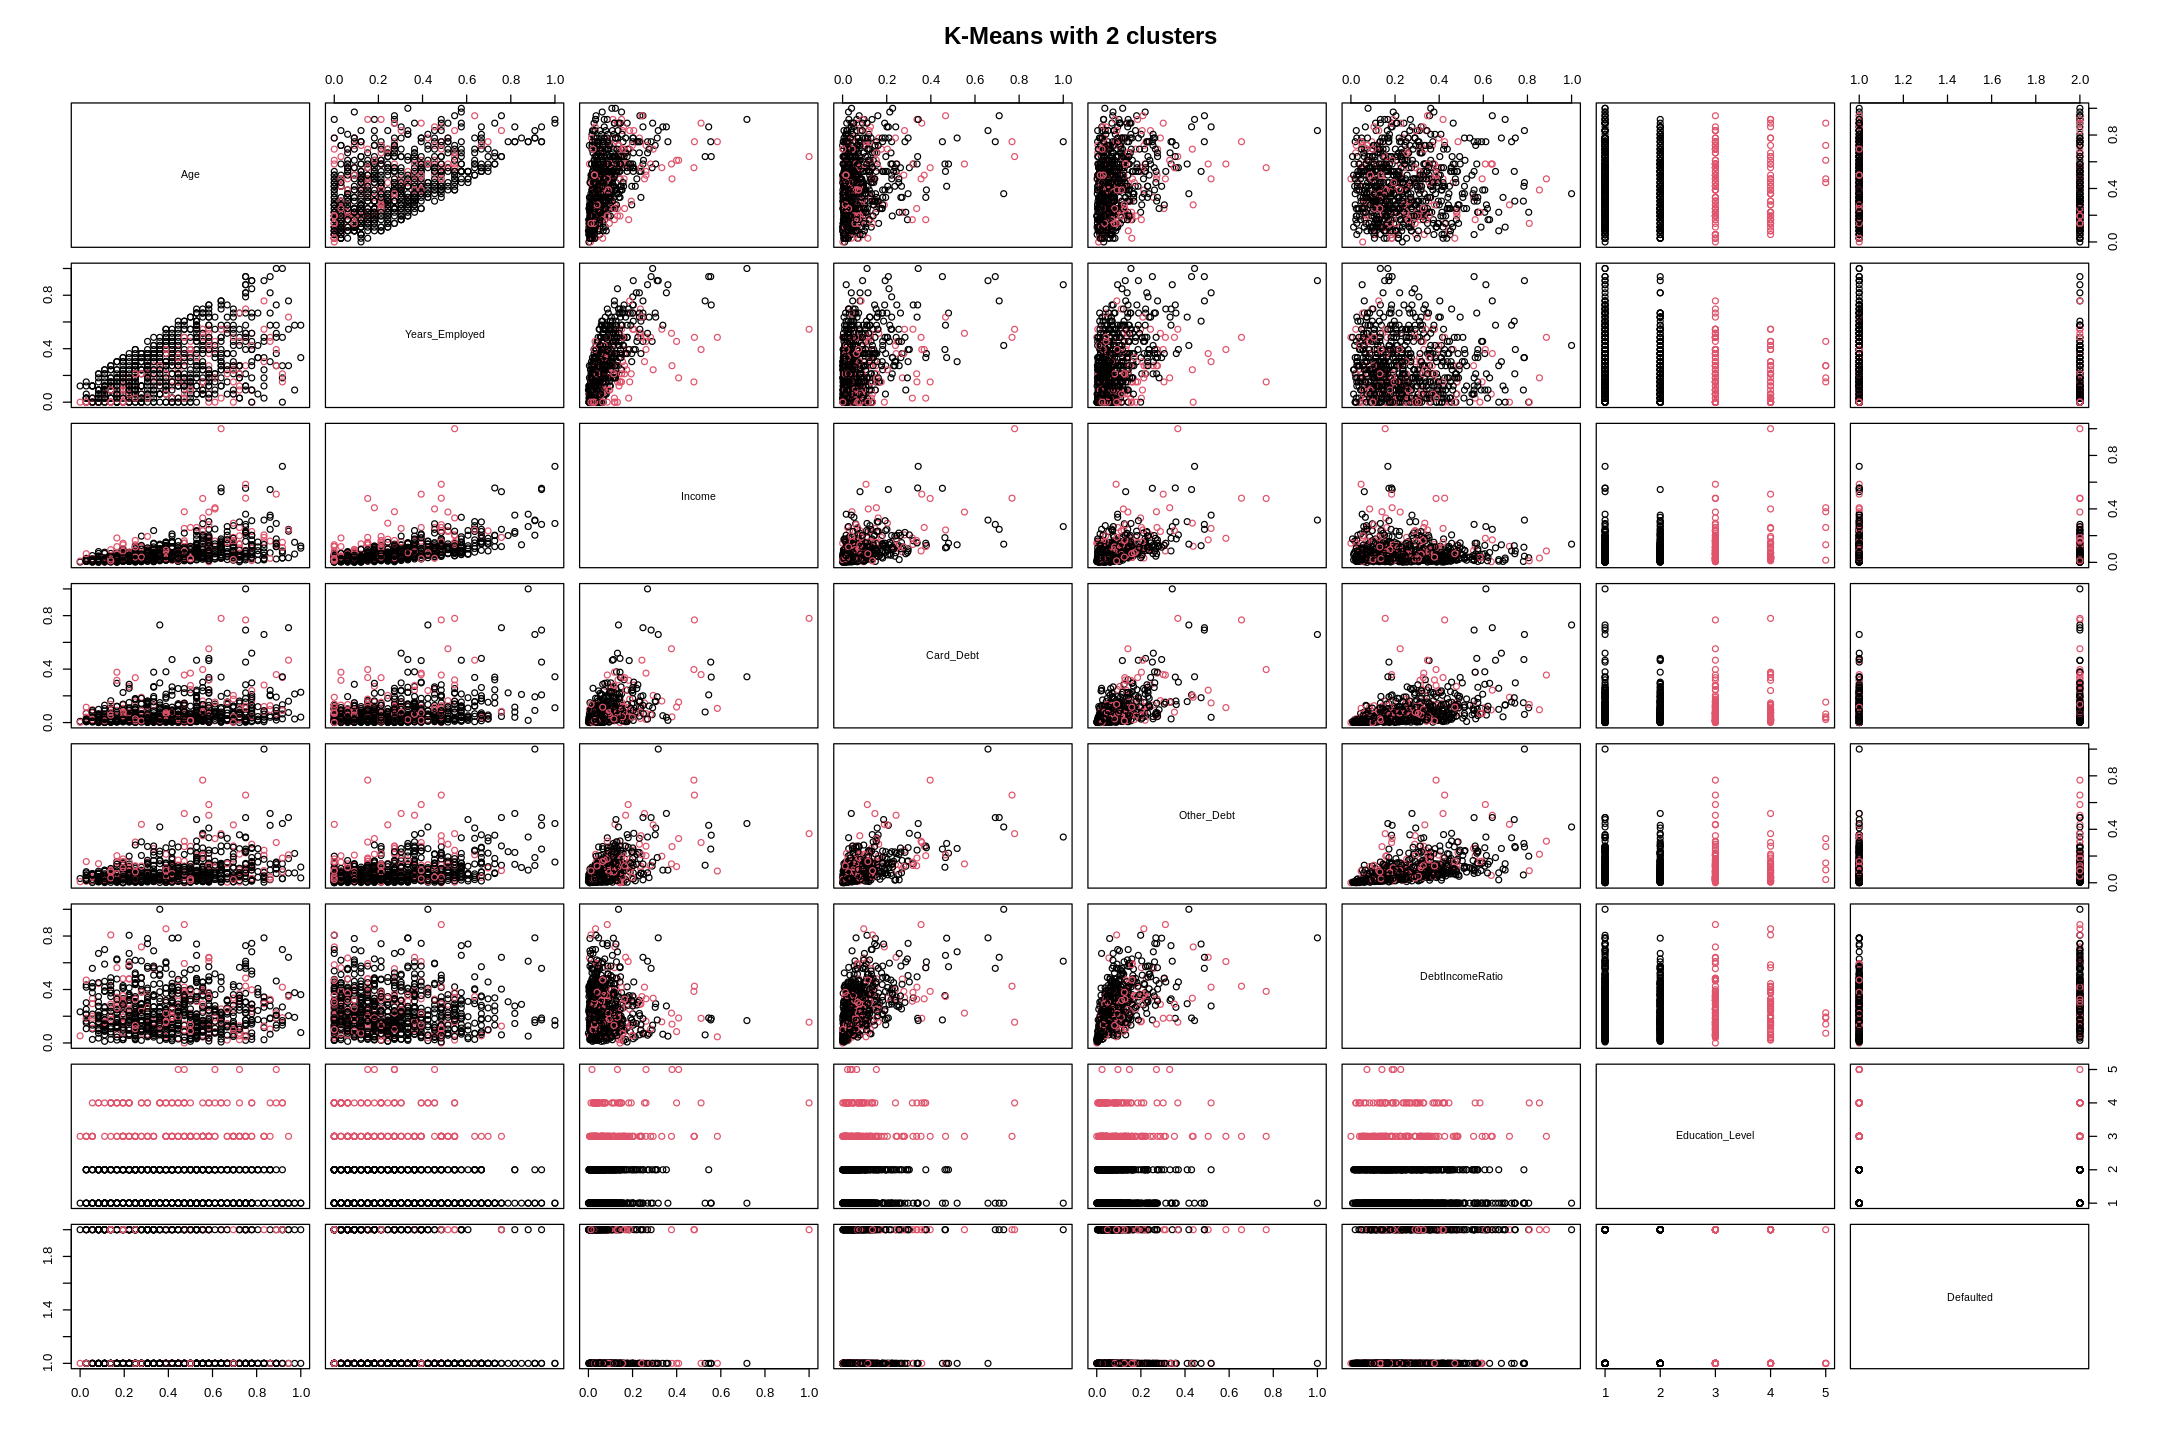

In [ ]:
# Visuaizing results 

#knitr::opts_chunk$set(fig.width=18, fig.height=12) 

library(repr)
options(repr.plot.width=18, repr.plot.height=12)

#set.seed(123)
#init <- sample(2, nrow(df3), replace=TRUE)
#plot(df3, col=init)

plot(df3, col=df_k2$cluster, main='K-Means with 2 clusters')

In [ ]:
# Interpreting results
# Cluster size
df_k2$size

[1] 695 155

The data has been clustered into 2 clusters of 695 observations with no default (0) and 155 observations as defaulters (1)






In [ ]:
# Between clusters sum of square
df_k2$betweenss

[1] 530.4543

The sum of squares between the two clusters is 530.45

In [ ]:
# Within cluster sum of square
df_k2$withinss

[1] 381.4708 105.9653

The sum of squares within each cluster is 381.47, 105.97

In [ ]:
# Total with sum of square
df_k2$tot.withinss

[1] 487.4361

The total sum of squares within both clusters is 487.44

In [ ]:
# Total sum of square
df_k2$totss

[1] 1017.89

The total sum of squares obtained from clustering the entire dataset is 1017.89



In [ ]:
#visualizing the clusters
#fviz_cluster(df_k2, data = df2.numeric)

#Optimizing K-means Algorithm

Under the k-means algorithm, the number of clusters is pre-specified before analysis. For this study, we have been given the class variable - Defaulted, which has two classes,indicating that we strictly have 2 classes. However, for datasets that do not have clear classes, it is impossible to know the optimal number of clusters. Thus, we can find the optimal number of k by creating a plot of the total sums of squares within-groups against the number of clusters. A bend in the graph can suggest the appropriate number of clusters in that dataset.

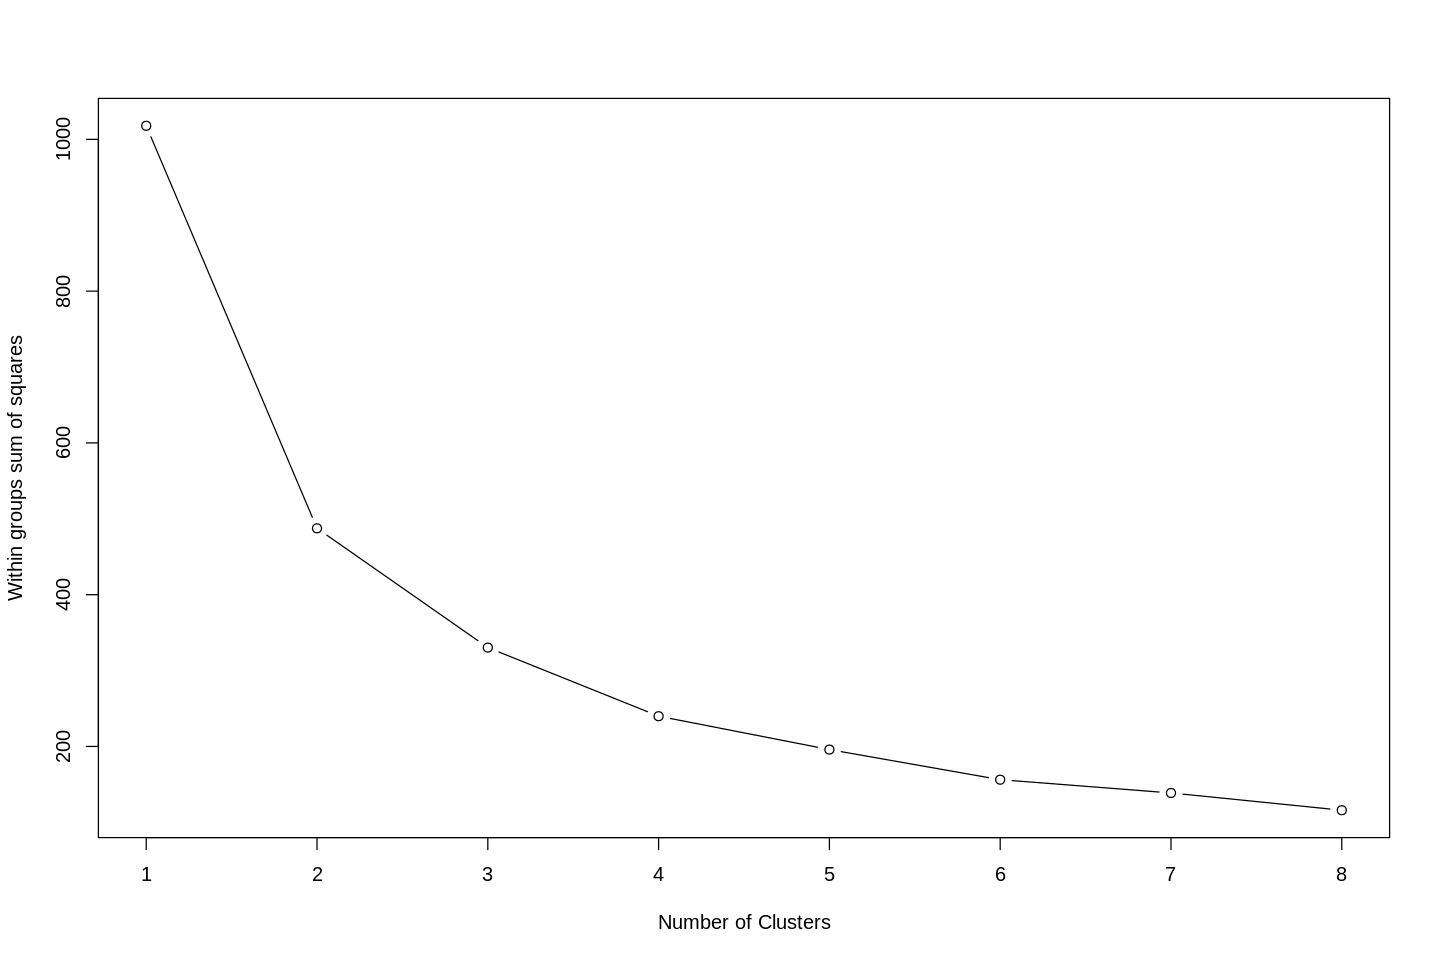

In [ ]:
# finding the optimal number of clusters

#fviz_nbclust(x = df2.numeric,FUNcluster = kmeans, method = 'wss')

options(repr.plot.width=12, repr.plot.height=8)

wss <- 0

# For 1 to 8 cluster centers
for (i in 1:8) {
  df_k2 <- kmeans(df3, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- df_k2$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:8, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

The Elbow method shows that there are 2 possible clusters in the dataset

In [ ]:
install.packages('tree')
library(tree)

##Silhouette Method

In [ ]:
# Determining Optimal clusters (k) Using Average Silhouette Method

#fviz_nbclust(x = df2.numeric,FUNcluster = kmeans, method = 'silhouette' )

In [ ]:
#applying k-means algorithm as with k = 2 and k =5 
#df_k2 <- kmeans(df2.numeric, centers = 2)
#df_k5 <- kmeans(df2.numeric, centers = 5)

#s1 <- fviz_cluster(df_k2, geom = "point", data = df2.numeric) + ggtitle(" K = 2")
#s2 <- fviz_cluster(df_k5, geom = "point", data = df2.numeric) + ggtitle(" K = 5")

#library(gridExtra)

In [ ]:
#grid.arrange(s1, s2, nrow = 2)

In [ ]:
#setting number of random starts to 15
#df_k3 <- kmeans(df2.numeric, centers = 2, nstart = 15)
#print(df_k3)

In [ ]:
#visualizing the clusters 
#fviz_cluster(df_k3, data = df2.numeric)

In [ ]:
#Descriptive statistics (mean) at the cluster level
#df2.numeric %>% 
#  mutate(Cluster = df_k3$cluster) %>%
#  group_by(Cluster) %>%
#  summarize_all('mean')

**Notes from k-means clustering**



Some advantages of k-means clustering we have observed are:

* It’s quite easy to implement
* The algorithm was computationally faster

Some disadvantages are:

* The number of clusters has to be defined from the beginning and we would not know how many clusters we should have

#Hierarchical Clustering

Hierarchical clustering is also a type of unsupervised machine learning algorithm that builds a hierarchy of clusters i.e tree type strucure based in hierarchy that helps solve the disadvantage mentioned above from k-means clustering.

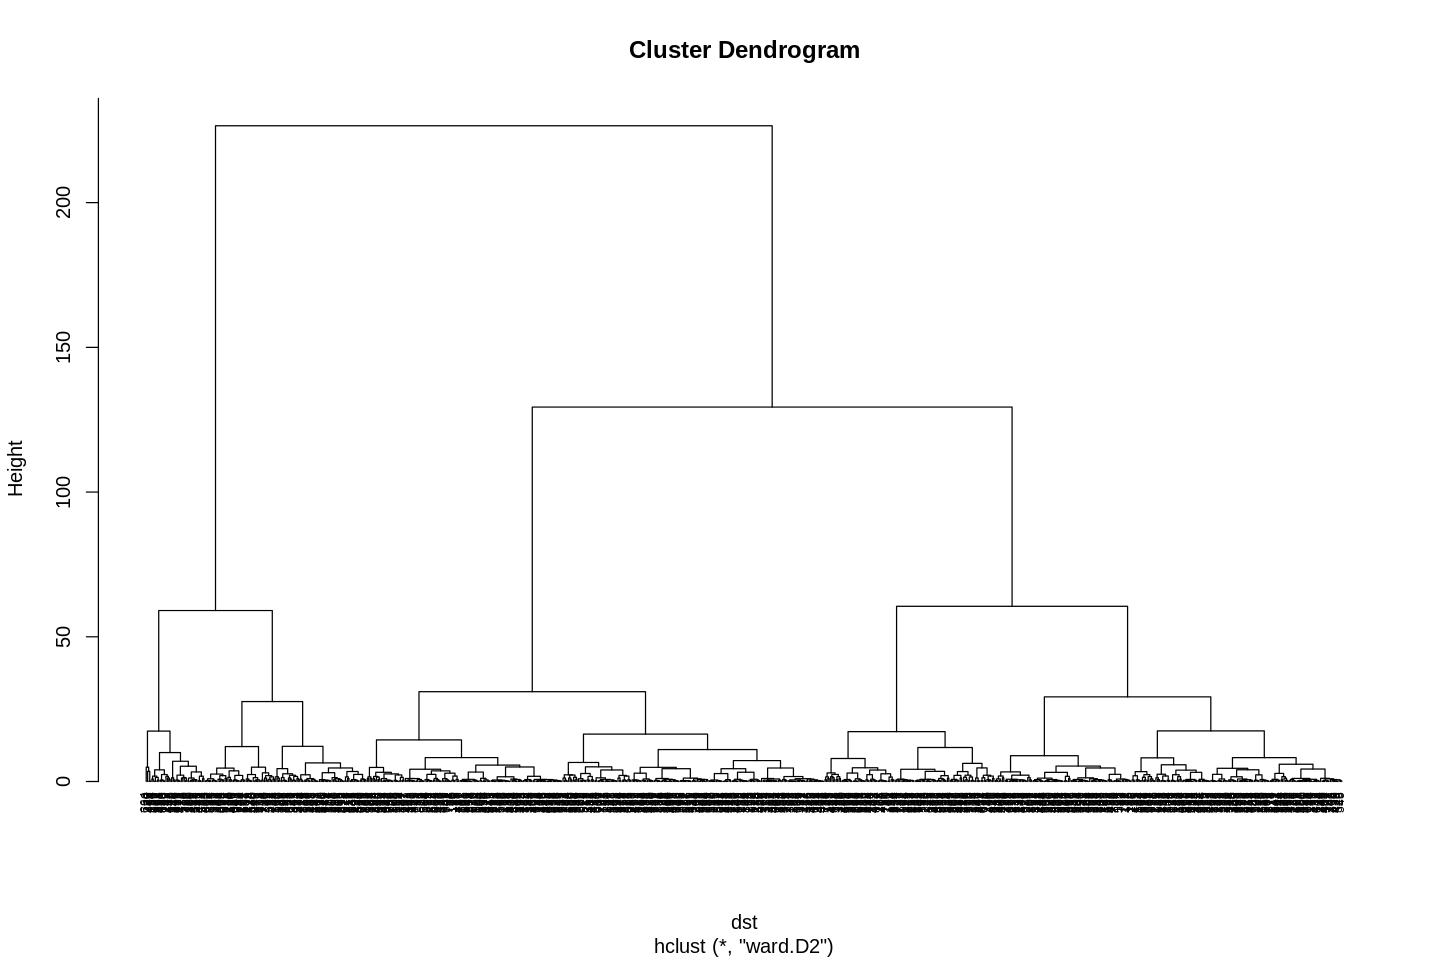

In [ ]:
# We use the R function hclust() for hierarchical clustering
# 
options(repr.plot.width=12, repr.plot.height=8)

set.seed(123)  #for reproducibility

# First we use the dist() function to compute the Euclidean distance between observations
dst <- dist(df2, method = "euclidean")

# We apply hierarchical clustering algorithim using the complete method
df2_h <- hclust(dst, method = "ward.D2" )

#plotting a dendrogram
plot(df2_h, cex = 0.6, hang = -1)

Our Dendrogram is messy hence we will try to use different approaches to obtain features from it


In [ ]:
summary(df2_h)

            Length Class  Mode     
merge       1698   -none- numeric  
height       849   -none- numeric  
order        850   -none- numeric  
labels         0   -none- NULL     
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

###Cutting the tree

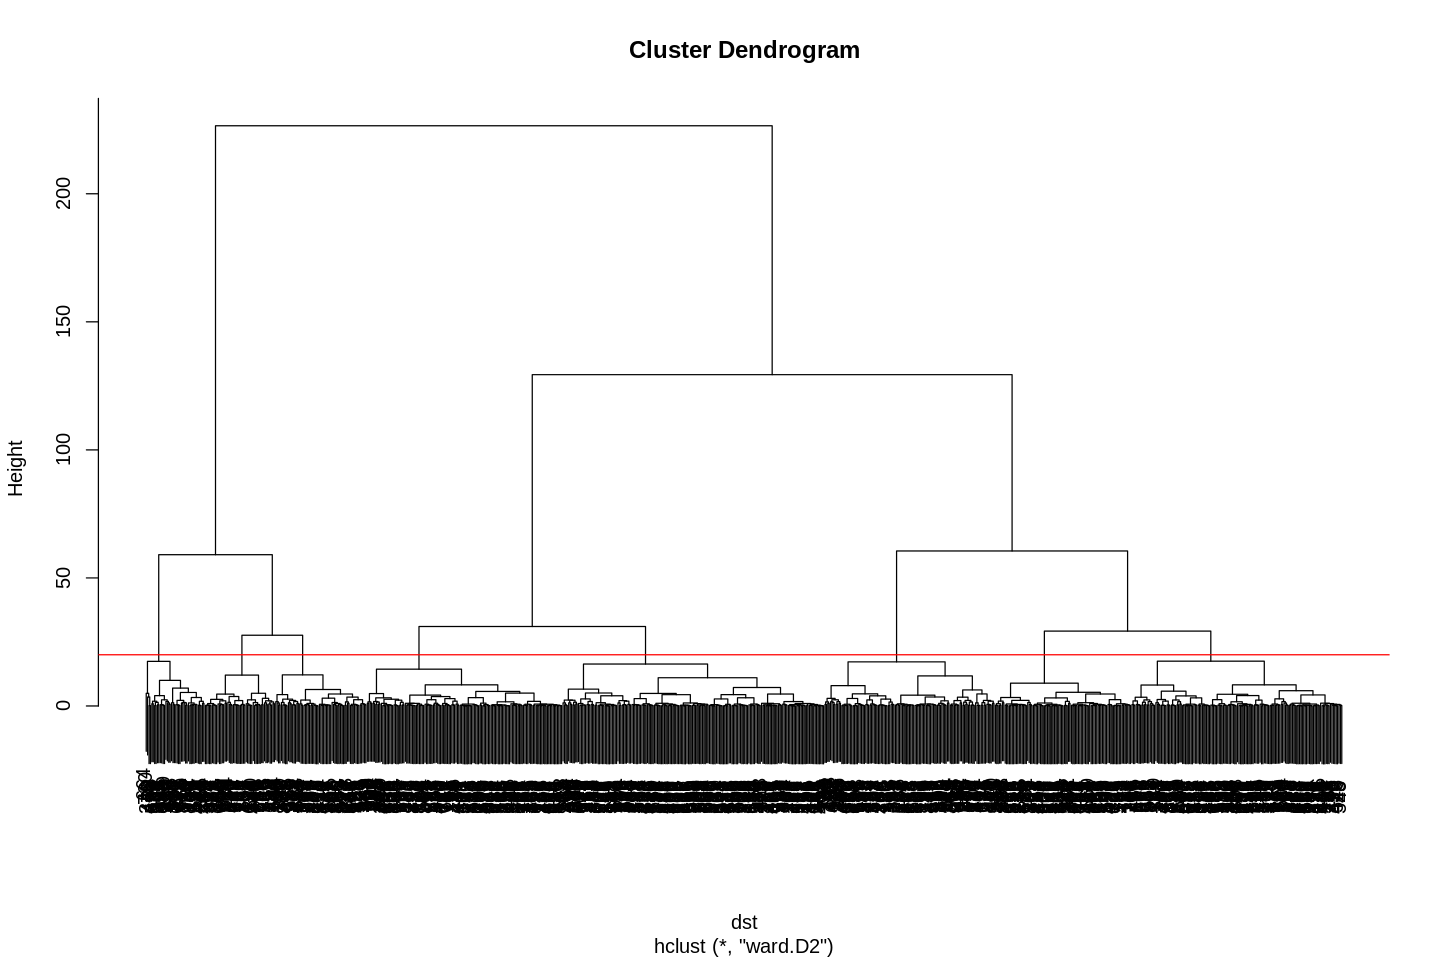

In [ ]:
plot(df2_h)
abline(h=20,col='red')

In [ ]:
# Cut by height
print(cutree(df2_h, h=20))

  [1] 1 2 3 4 4 5 3 6 6 3 3 7 1 2 1 6 7 7 1 3 4 7 6 2 5 4 7 6 1 3 6 4 1 5 6 7 7
 [38] 2 1 3 1 8 4 5 3 1 7 7 6 7 2 7 7 8 6 3 1 6 7 6 2 4 4 7 7 7 4 7 2 1 6 6 4 7
 [75] 7 4 3 1 2 2 3 6 3 4 1 7 1 7 7 7 7 1 6 7 1 8 3 4 1 1 7 1 5 7 7 6 2 7 7 1 5
[112] 1 3 7 4 3 7 3 7 6 7 7 6 3 3 6 3 6 6 1 5 4 6 6 1 5 3 1 7 3 6 7 1 6 6 7 4 3
[149] 7 7 7 6 6 1 4 1 4 4 6 6 1 7 7 3 4 1 6 4 6 8 4 7 1 7 3 8 3 7 7 8 3 7 7 2 1
[186] 6 6 6 3 5 3 1 6 3 5 3 1 3 8 2 4 2 7 1 8 1 7 5 7 6 4 3 4 8 4 7 7 6 4 6 7 3
[223] 1 1 4 4 8 4 5 2 6 4 4 7 3 1 4 7 3 7 4 4 6 7 3 2 4 4 3 7 6 1 7 6 8 7 3 1 7
[260] 1 3 7 1 7 2 3 7 5 7 3 6 7 4 2 6 7 1 5 6 7 6 4 3 1 5 3 1 7 5 5 1 2 3 7 1 4
[297] 1 4 1 7 6 5 7 4 7 3 5 6 3 1 7 4 5 6 5 6 7 7 3 4 3 2 5 1 1 4 7 6 7 6 7 3 7
[334] 2 3 3 1 8 7 8 5 7 5 3 1 8 7 1 1 7 4 6 7 3 6 2 3 5 3 1 6 3 7 7 5 4 5 1 8 6
[371] 1 6 2 6 7 3 6 7 6 7 5 7 1 7 5 7 3 7 3 7 4 7 5 3 6 6 6 8 4 6 1 7 4 6 7 1 4
[408] 3 3 5 7 3 6 5 1 8 5 7 3 5 4 3 1 5 1 2 7 7 7 6 7 1 3 1 6 4 6 1 7 2 4 8 4 3
[445] 6 7 6 6 2 3 3 7 1 1 2 5 1 7 4 3 7 

In [ ]:
# Cut by number of clusters
print(cutree(df2_h, k=2))

  [1] 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1
 [38] 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1
 [75] 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[186] 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
[223] 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1
[260] 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1
[297] 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
[334] 2 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1
[371] 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1
[408] 1 1 2 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1
[445] 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 

In [ ]:
#Determine the optimal k
#fviz_nbclust(df2.numeric, FUN = hcut, method = "silhouette", 
#                   k.max = 10)

In [ ]:
#obtaining the subgroups from the dendrograms

# Cut tree into 2 groups
sub_grp <- cutree(df2_h, k = 2)

# Number of members in each cluster
table(sub_grp)

sub_grp
  1   2 
693 157 

The size obtained from hierarchical clustering is 693 from no default and 157 from defaults



In [ ]:
install.packages('dendextend')
suppressPackageStartupMessages(library(dendextend))

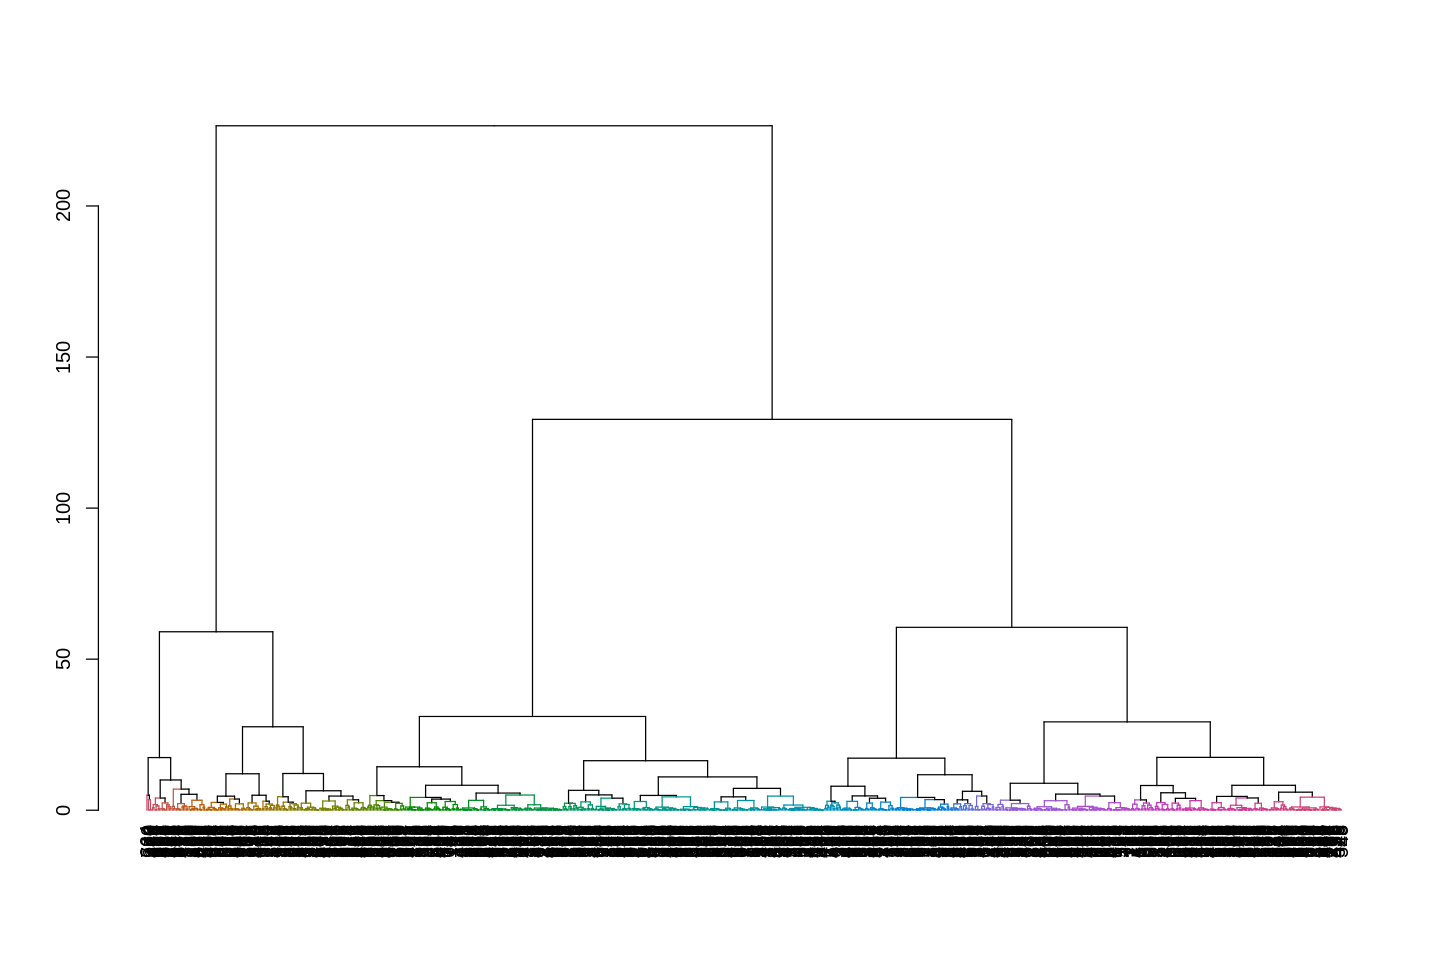

In [ ]:
avg_dend_obj <- as.dendrogram(df2_h)
avg_col_dend <- color_branches(avg_dend_obj, h = 2)
plot(avg_col_dend)

In [ ]:
suppressPackageStartupMessages(library(dplyr))
df2_ct <- mutate(df2, cluster = sub_grp)
#count(df2_ct,cluster)

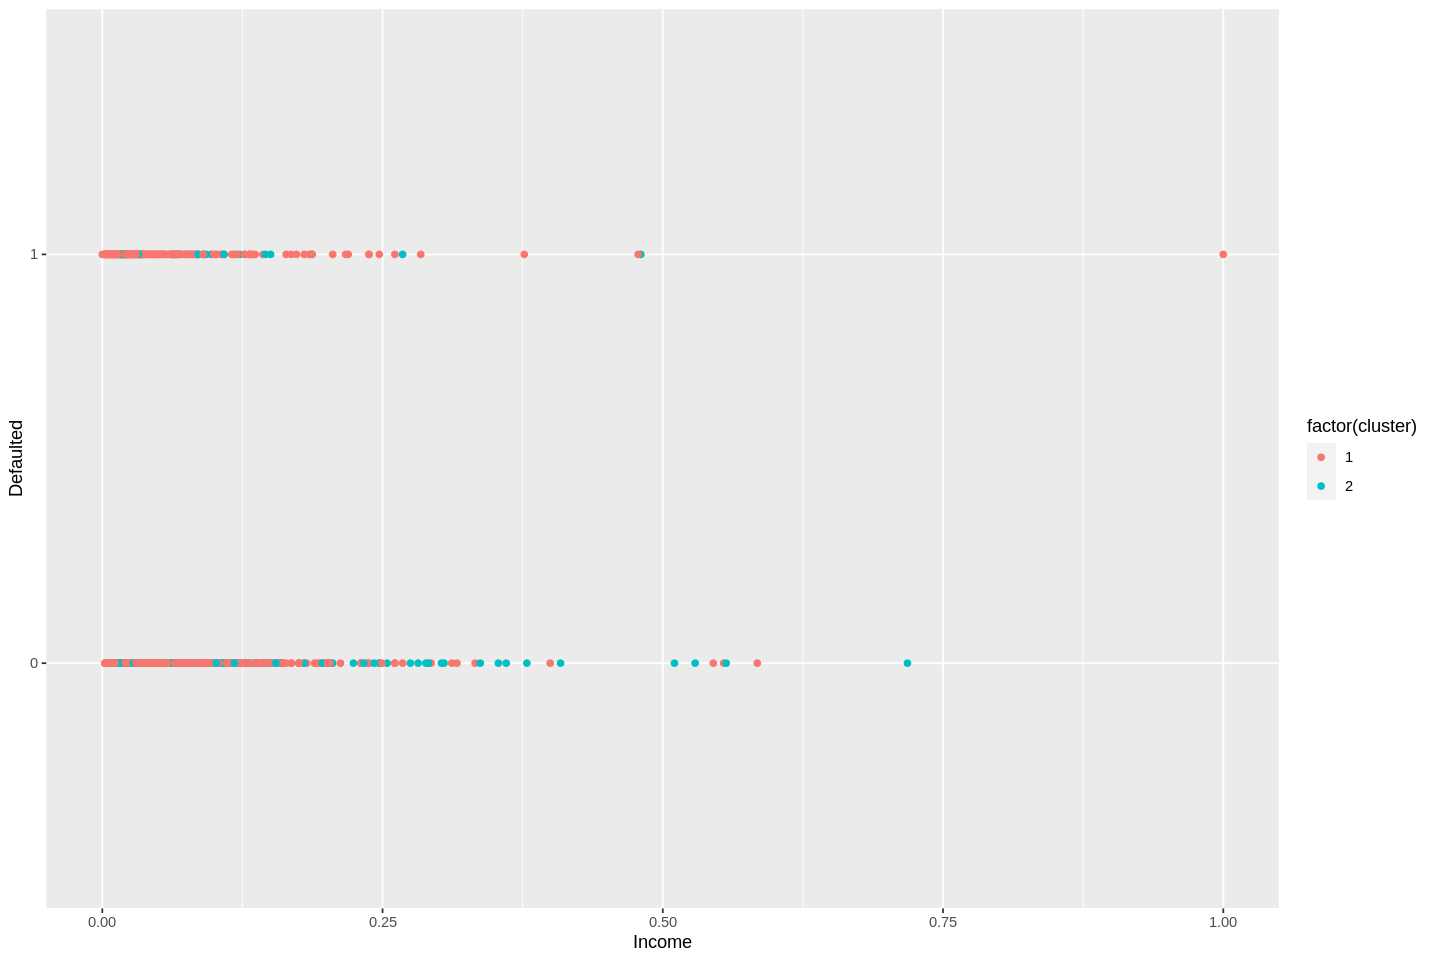

In [ ]:
#visualizing the clusters generated using a plot of income and debt default

suppressPackageStartupMessages(library(ggplot2))
ggplot(df2_ct, aes(x=Income, y = Defaulted, color = factor(cluster))) + geom_point()

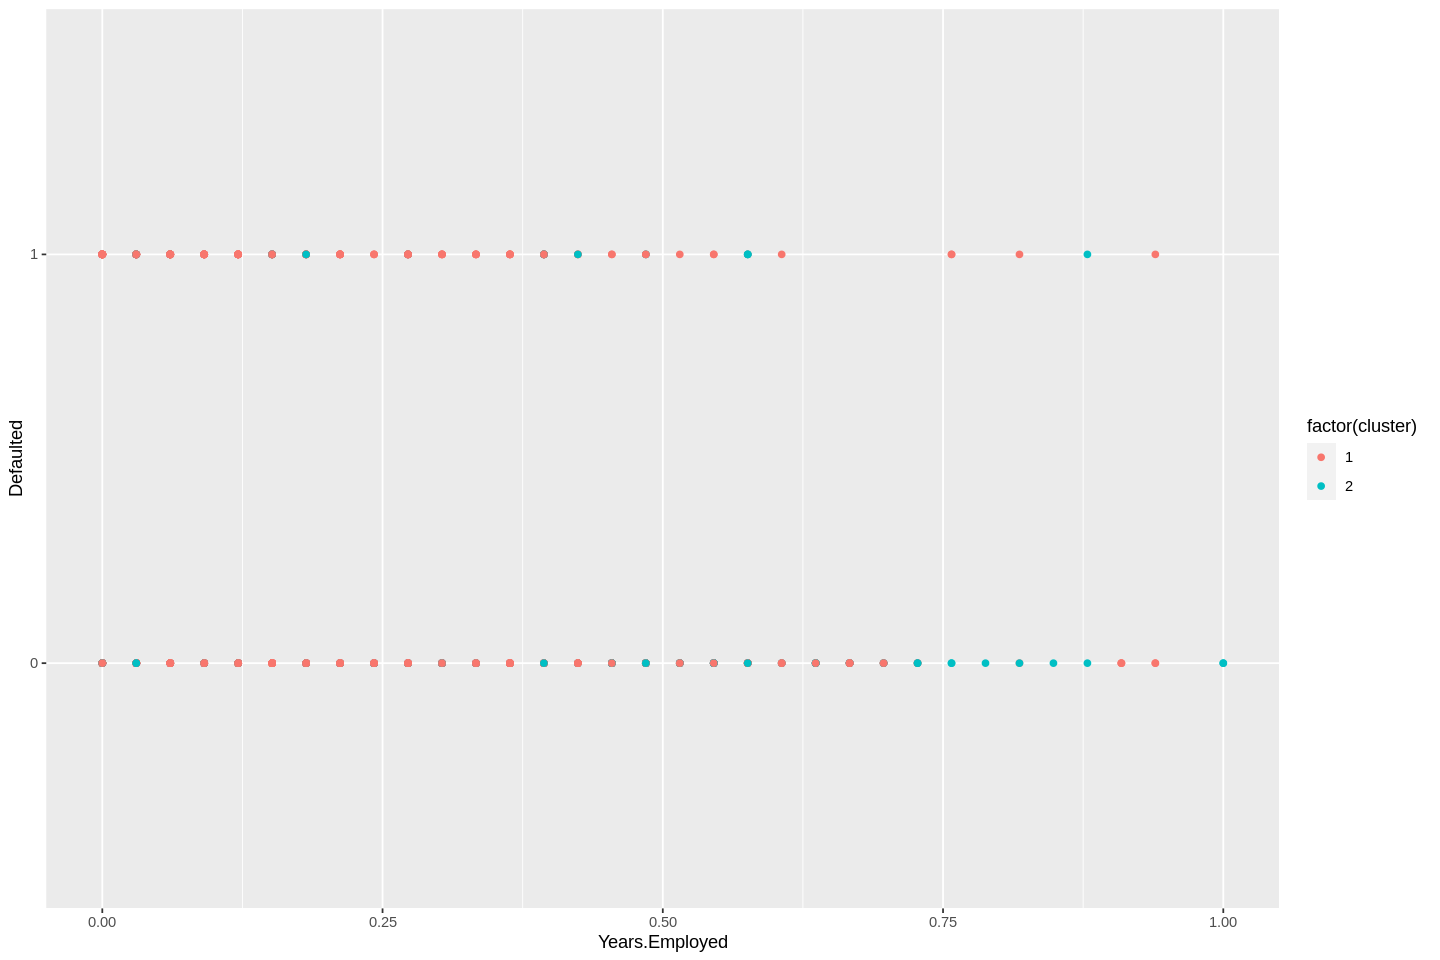

In [ ]:
#visualizing the clusters generated using a plot of experience and defaulted
ggplot(df2_ct, aes(x=Years.Employed, y = Defaulted, color = factor(cluster))) + geom_point()

##Twins diagrams: agnes and diana

The cluster package allows us to draw agnes and diana diagrams.


In [ ]:
install.packages('ggdendro')
library(ggdendro)

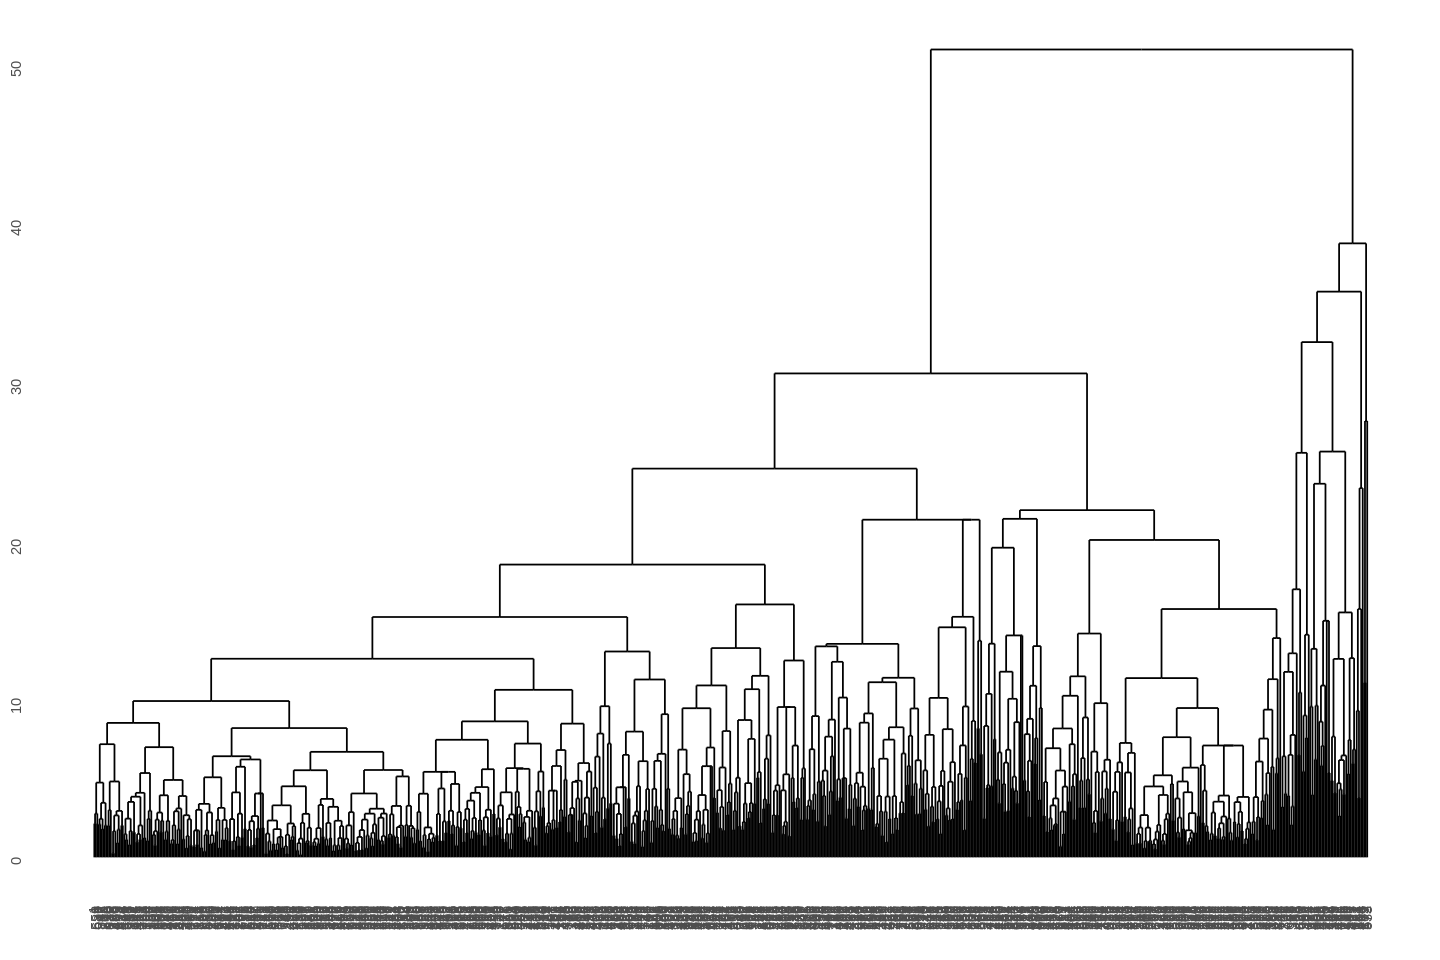

In [ ]:
# Visualization of the twin diagrams 
if(require(cluster)){
  model <- agnes(df3, metric = "manhattan", stand = TRUE)
  dg <- as.dendrogram(model)
  ggdendrogram(dg)
  
  model <- diana(df3, metric = "manhattan", stand = TRUE)
  dg <- as.dendrogram(model)
  ggdendrogram(dg)
}
#> Loading required package: cluster

No better insights could be drawn from the twin diagrams

In [ ]:
#creating a confusion matrix to compare the actual classes and the predicted classes

table(df2_ct$cluster,df2$Defaulted)

   
      0   1
  1 496 197
  2 135  22

The true positives is the highest and the number of true negatives is also high. The number of false positives and false negatives is lower but there is also a significant number of false positives.


**Notes from Hieracrchical Clustering**



Some advantages of hierachical clustering include;

* No need to specify the number of clusters prior
* It is an easy algorithm to implement
* Outputs a hierarchy, which with a small dataset can be easy to read and understand

Some of the disadvantages include;

* For the dendrogram produced, the datapoints were too many, causing massive overlaps. This means that we could not obtain any information from the structure. This algorithm proved unreliable for huge datasets

## Rtsne

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that is used for the visualization of a high - dimensional dataset. This technique is used to challenge the clustering methods used above. 

In [ ]:
install.packages('Rtsne')
library('Rtsne')

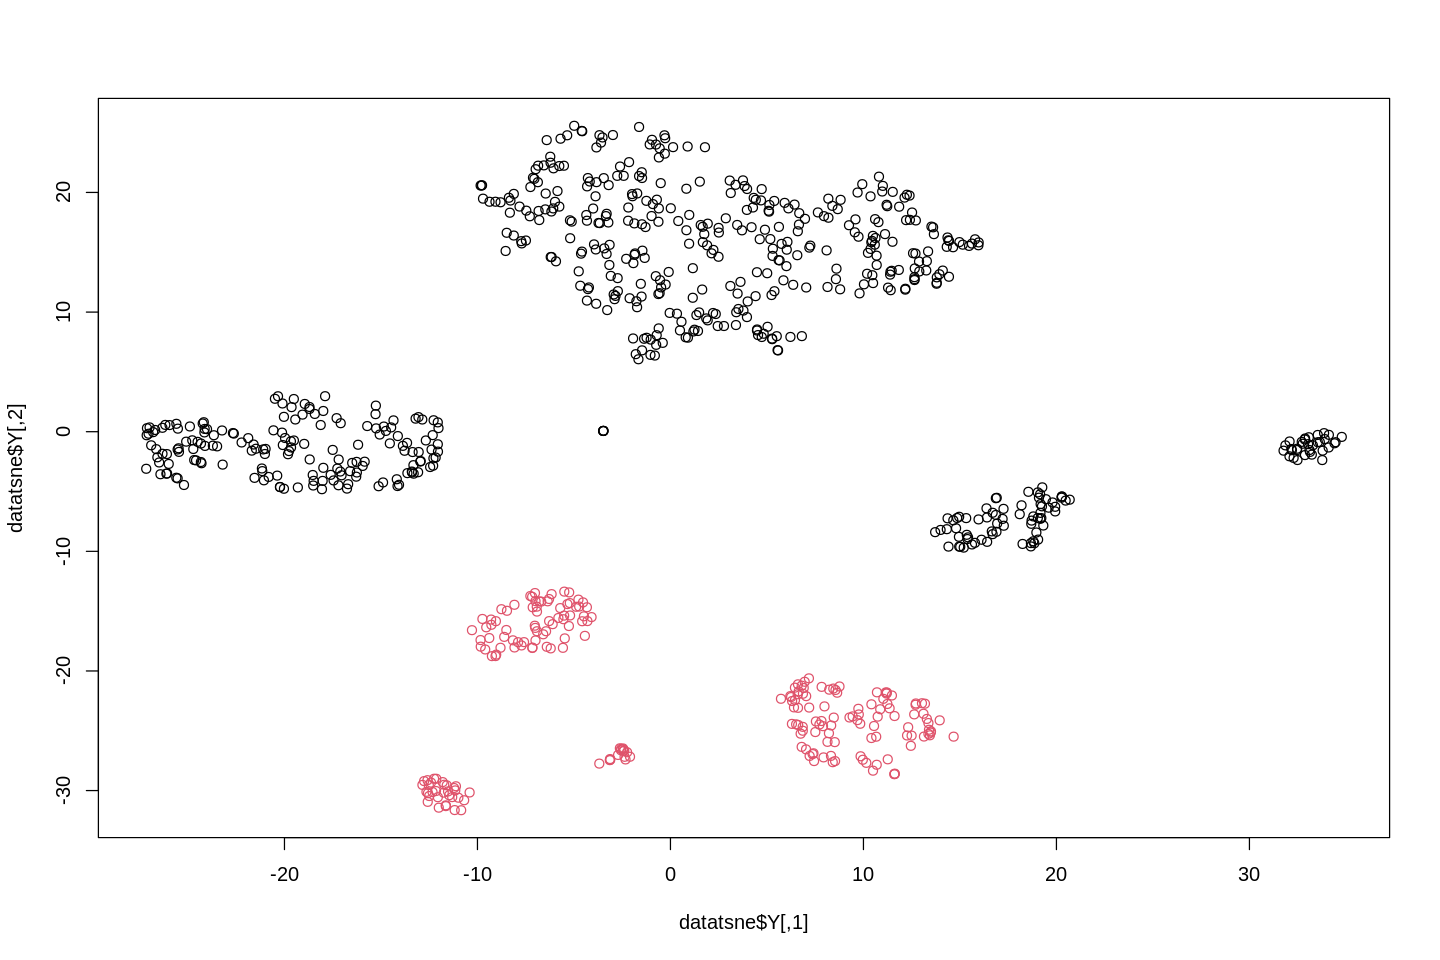

In [ ]:
# Visualizing tsne output
data <- unique(df3)
datatsne<-Rtsne(data[,1:8])
plot(datatsne$Y, col=df3$Defaulted)

This shows 2 distinct clusters from the dataset

#Custplots

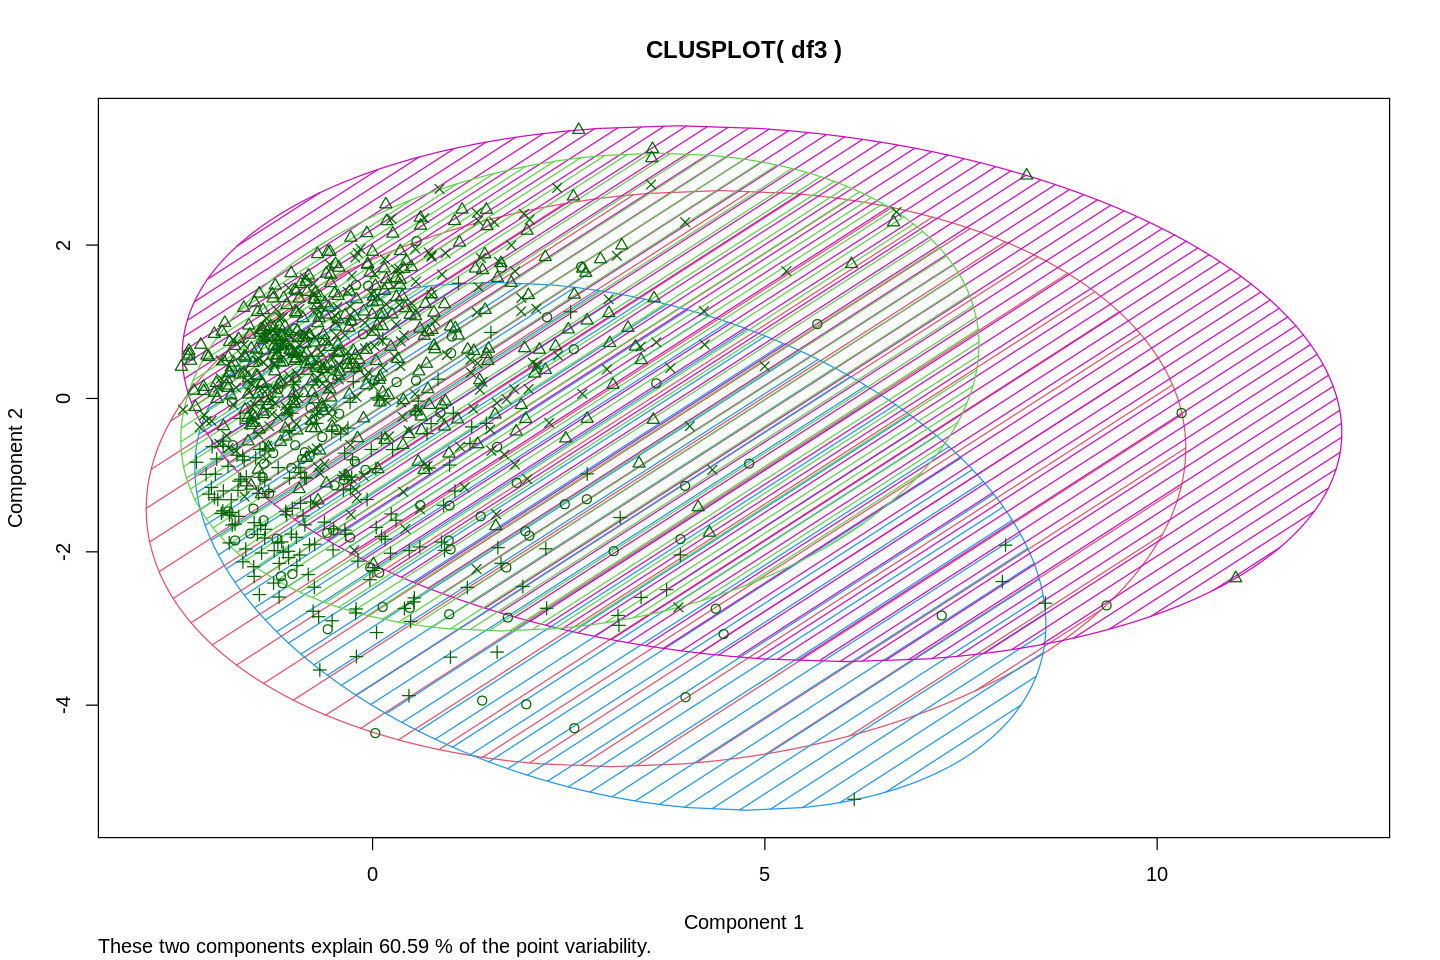

In [ ]:
# Visualizing 4 clusters using clustplots
model = kmeans(df3, 4)
clusplot(df3, model$cluster, color=T,shade=T)

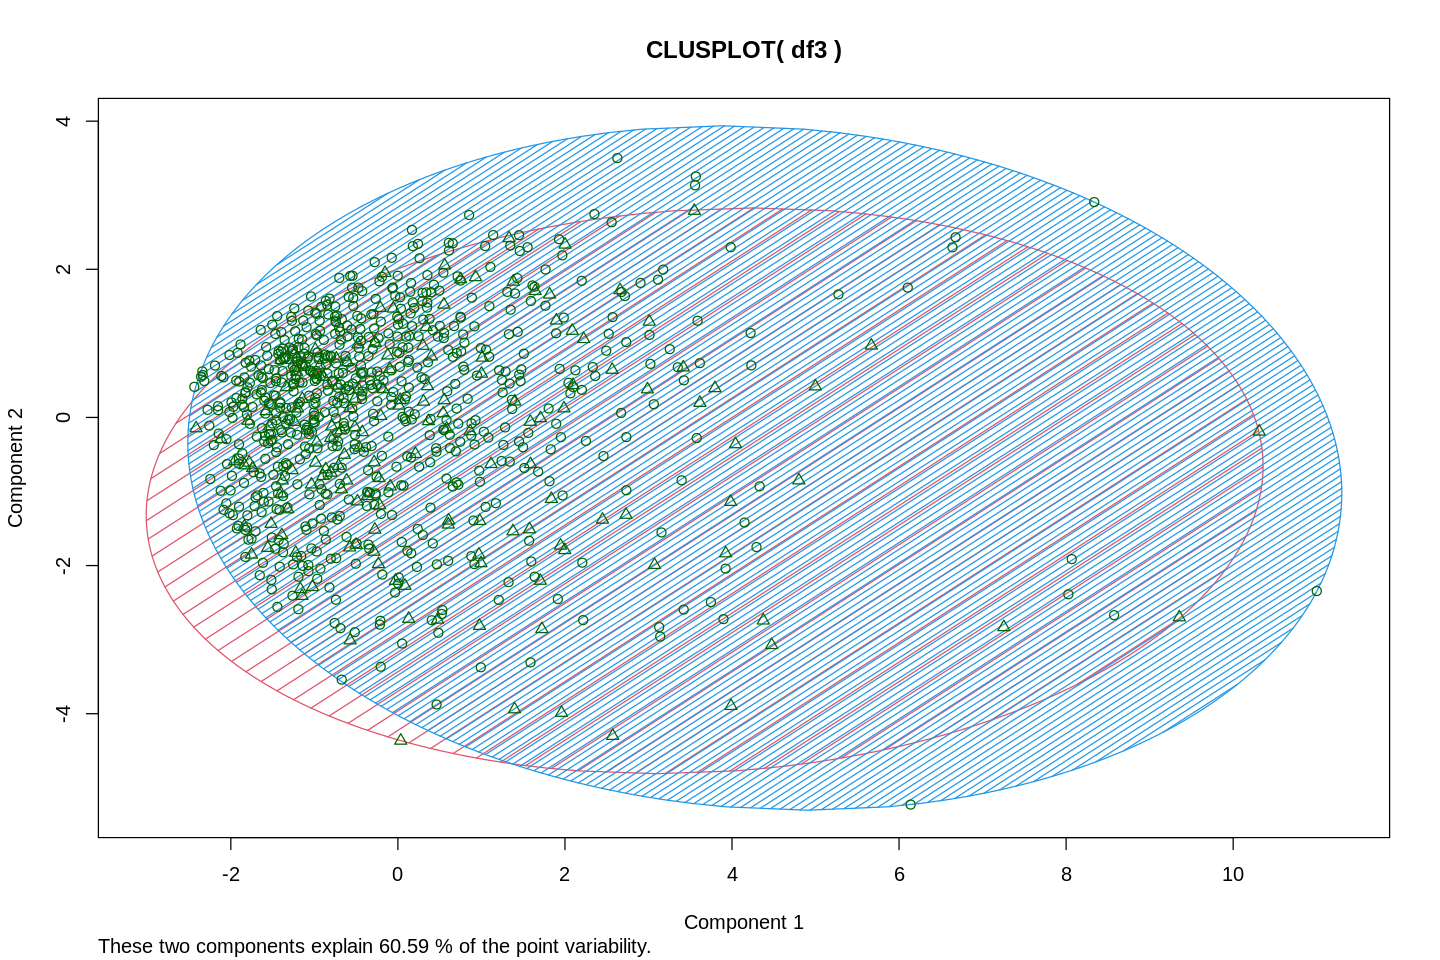

In [ ]:
# Visualizing 2 clusters
model = kmeans(df3, 2)
clusplot(df3, model$cluster, color=T,shade=T)

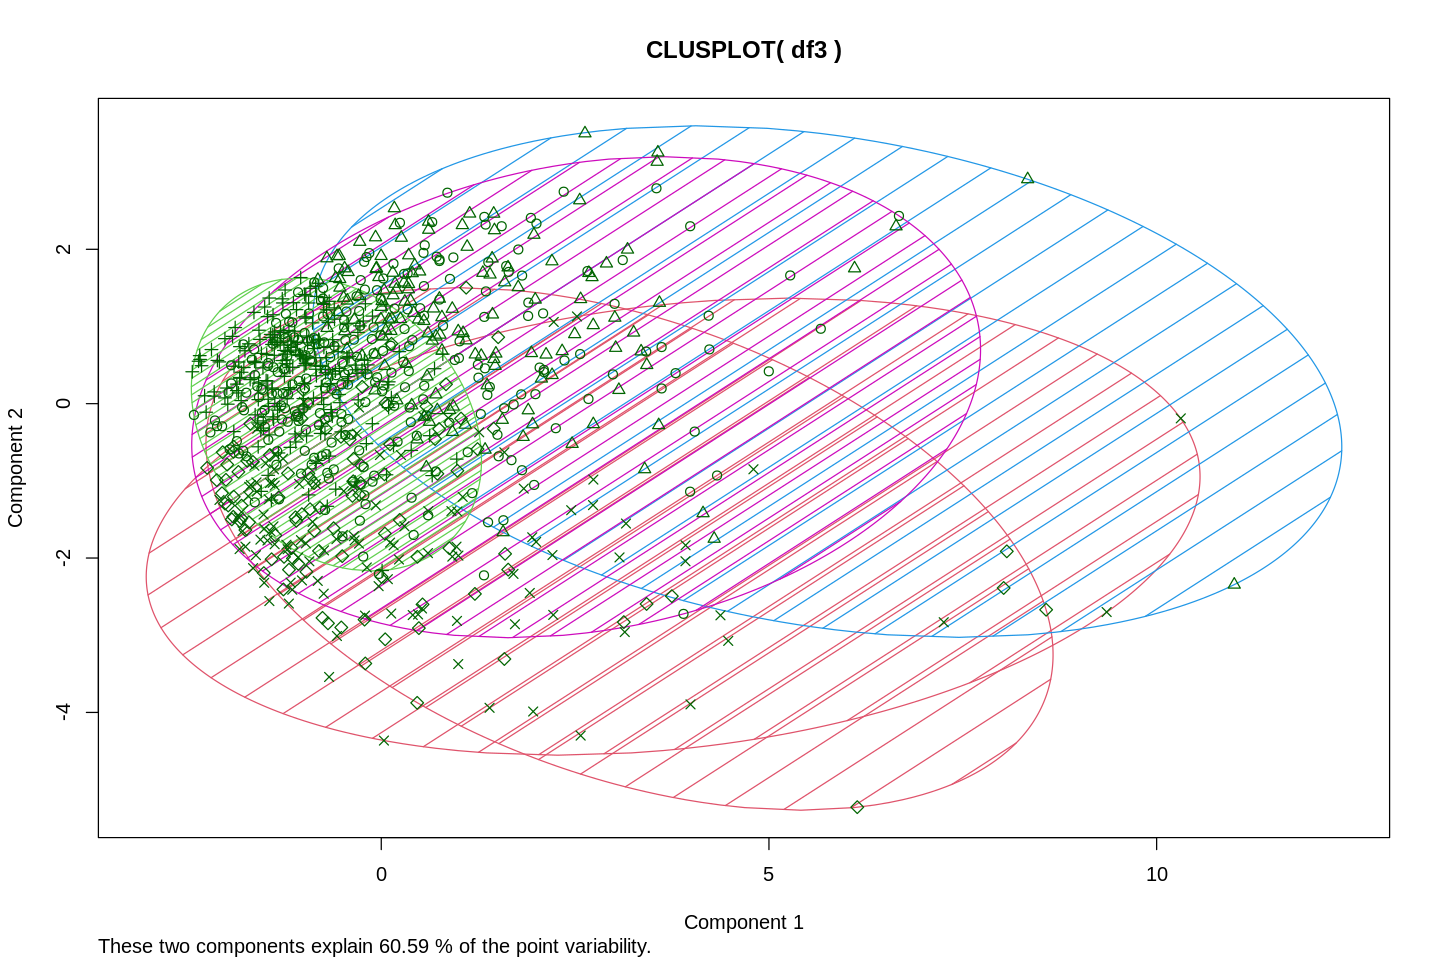

In [ ]:
# Visualizing 5 clusters
model = kmeans(df3, 5)
clusplot(df3, model$cluster, color=T,shade=T)

Two clusters seem a better representation of the groups in our dataset

#8. Challenging the Solution

From the metrics of success outlined at the beginning of this study, we can consider this study successfull. However, from the Hierachical clustering, we were not able to make the best use of the algorithm as we could not interprete the dendrogram. In order to rectify this, it would probably be best to obtain samples of the data and use these sapmles to plot the dendrogram.

From both the k-Means clustering and the Hierarchial clustering, we obtained different cluster sizes. It is difficult to tell which of the two clustered the best. However, it is evident that K-means is less computationally expensive than hierarchical clustering and can be run on large datasets within a reasonable time frame.

Both Agnes and Diana diagrams did not provide any better view either. Using tsne, we got 2 distinct classes. Even though tsne is effective in high-dimensional data, we utilised it to challenge our solution.

